## Breast Cancer Classification (SVM)

Breast cancer is the most common cancer among women world wide:
- Accounts for 25% of all cancer cases
- Affected 2,100,000 people in 2015

Early diagnosis significantly increases the chances of survival. The key challenge in cancer detection is how to classify tumors into malignant or benign. ML techniques are able to improve the accuracy of diagnosis. According to Dr. Ryan Ahmed (https://www.eng.mcmaster.ca/mech/people/adjuncts-associates#ryan-ahmed) research indicates that most experienced physicians can diagnose cancer with 79% accuracy. In contrast, an 100% correct diagnosis was acheived using a SVM model trained on a 70-30 split training-test dataset. 

In workbook, I will present a method to classify tumors as either malignant or benign tumors using features obtained from cell images. 

The cancer diagnosis procedure may be outlined as follows (https://www.researchgate.net/publication/271907638_Breast_Cancer_Detection_with_Reduced_Feature_Set):
- Perform Fine Needle Aspirate (FNA)
 - Simply put, this is the extraction of some of the cells from the tumor
 - At this stage, the tumor has not been classified as either malignant or benign
- Image the cell extraction
- Extract features out of the cell extraction image
 - Radius
 - Texture
 - Area
 - Smoothness
 - Etc
- These features are then fed the the developed machine learning model which in turn provides a classification

### Dataset in Machine Learning Terms

Data Sources: 
- https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
- https://www.researchgate.net/publication/271907638_Breast_Cancer_Detection_with_Reduced_Feature_Set

In the first step we have the images accquired using the FNA technique. From each image, 30 features are extracted out. This dataset contains 569 instances, with the following class distribution:
- 212 Malignant
- 357 Benign

Each feature set of an instance can then be fed through the classifier (machine learning model) which will then predict if the tumor is either malignant or benign.

To develop the classifier, a support vector machine (SVM) classifier will be developed.

SVM works well in this instance for a unique reason; the feature set instances which "fall on" the support vectors that are used to define the unique classes would present difficulty to discern by the human eye (doctors would have trouble determining whether a tumor is maglignant or benign as the tumors could easily appear as both). Using the machine learning algorithm, the accuracy of classification in these more challenging instances is greater.

Another option would be to develop a convolutional neural network to perform the classification, which would remove the human step of feature extraction from the FNA images. This would be an interesting challenge to develop, and significant work with computer vision (CV) and medical imaging has developed in recent years. For this project, CV is out of the scope.

### Data Visualization

- Several features from the FNA images have already been outlined. A more comprehensive list of some of the 30 unique features is below.
    - radius (mean distance from center to points on the perimeter)
    - texture (standard deviation of gray-scale values
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)
- The datasets are linearly separable using all 30 input features
- Number of Instances = 569
- Class Distribution: 212 Malignant, 357 Benign
- Target Class:
 - Malignant
 - Benign

##### Source:

 https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

##### Importing Data to Jupyter Notebook

In [1]:
# Import relevant 3rd party libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

In [2]:
# Load in the dataset
from sklearn.datasets import load_breast_cancer

In [3]:
# Create cancer obj which is an instance of the sklearn dataset
cancer = load_breast_cancer()

In [4]:
pprint(cancer)

{'DESCR': '.. _breast_cancer_dataset:\n'
          '\n'
          'Breast cancer wisconsin (diagnostic) dataset\n'
          '--------------------------------------------\n'
          '\n'
          '**Data Set Characteristics:**\n'
          '\n'
          '    :Number of Instances: 569\n'
          '\n'
          '    :Number of Attributes: 30 numeric, predictive attributes and '
          'the class\n'
          '\n'
          '    :Attribute Information:\n'
          '        - radius (mean of distances from center to points on the '
          'perimeter)\n'
          '        - texture (standard deviation of gray-scale values)\n'
          '        - perimeter\n'
          '        - area\n'
          '        - smoothness (local variation in radius lengths)\n'
          '        - compactness (perimeter^2 / area - 1.0)\n'
          '        - concavity (severity of concave portions of the contour)\n'
          '        - concave points (number of concave portions of the '
       

Lets take a look at the keys in the dataset dictionary object

In [5]:
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


Let's dive  into the description of the dataset...

In [6]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

And let's also look specifically at the features of this dataset

In [7]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


And also, lets take a look at the "target" (this is an array which provides the classification of each tumor sampled). A zero indicates a malignant tumor, while a one indicates a benign tumor.

In [8]:
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

To inspect the target names, we look at the target_names key.

In [9]:
print(cancer.target_names)

['malignant' 'benign']


We can also get the shape of the data set

In [10]:
print(f'The shape of the data set is {cancer.data.shape[0]} rows by {cancer.data.shape[1]} columns (features).')

The shape of the data set is 569 rows by 30 columns (features).


To begin working with this data, we're going to load it into a pandas dataframe. We're going to make this using numpy and by appending the target data to the feature data.

In [11]:
cancer_df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

Lets take a quick look at the head of the dataframe...

In [12]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


##### Visualizing the Data

Let's start by arbitrarily looking at the relationships between the first five features of the dataset using the Seaborn library. The "hue" keyword variable to the pairplot function allows for the categorization of classes.

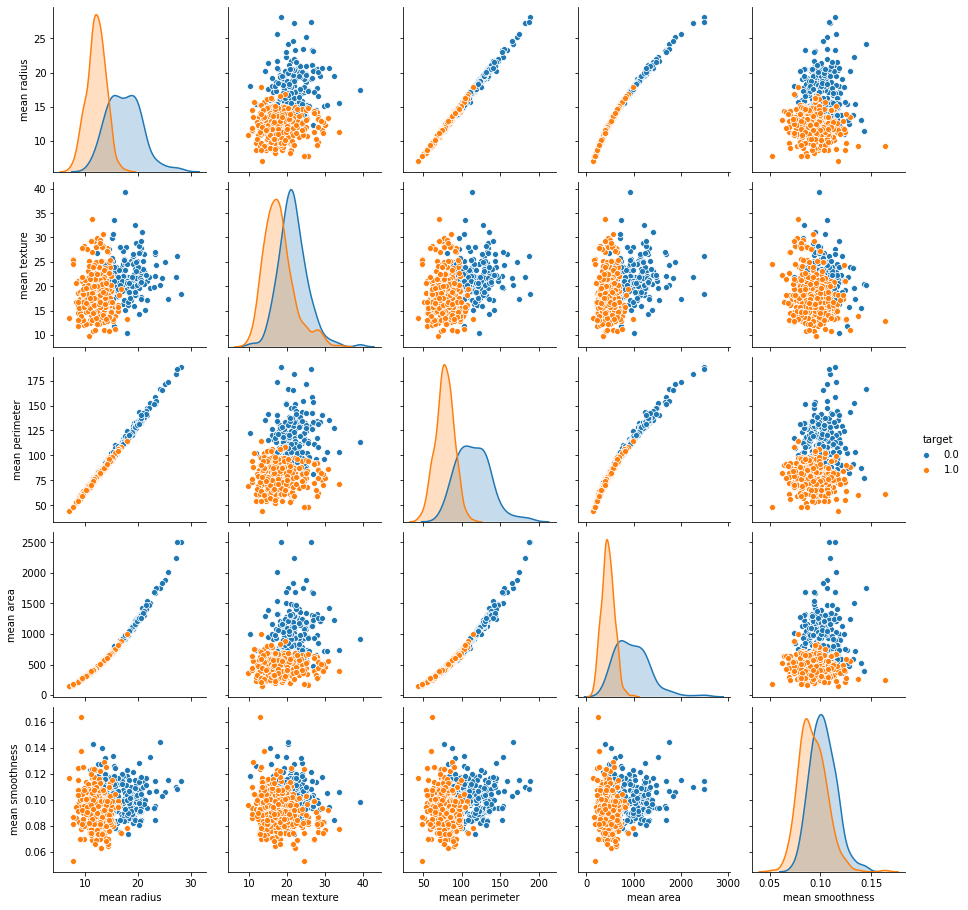

In [13]:
sns.pairplot(cancer_df, hue = 'target', vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'])

This is pretty interesting! Clearly, there are patterns emerging in the classification of the tumors (recall, zero \[blue data points\] indicate malginant tumors while one \[orange data points\] indicate benign tumors).

Let's take a quick look at how many malignant instances there are in the dataset versus benign instances in the dataset. We can use the Seaborn library again for this.

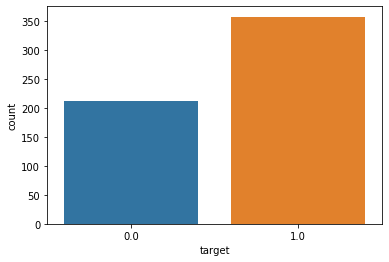

In [14]:
sns.countplot(cancer_df['target'])

We can visually see that there are just over 200 malignant instances while there's around 350 benign instances.

Let's now take a more detailed look at one of the scatter plots from the above pairplot. We'll compare the mean area as the independent variable, and the mean smoothness as the dependent variable (\***Note**\* I am not implying that the mean smoothness is a function of the mean area).

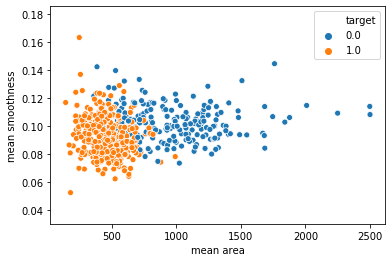

In [15]:
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = cancer_df)

Let's add some code to be able to display correlation of the features

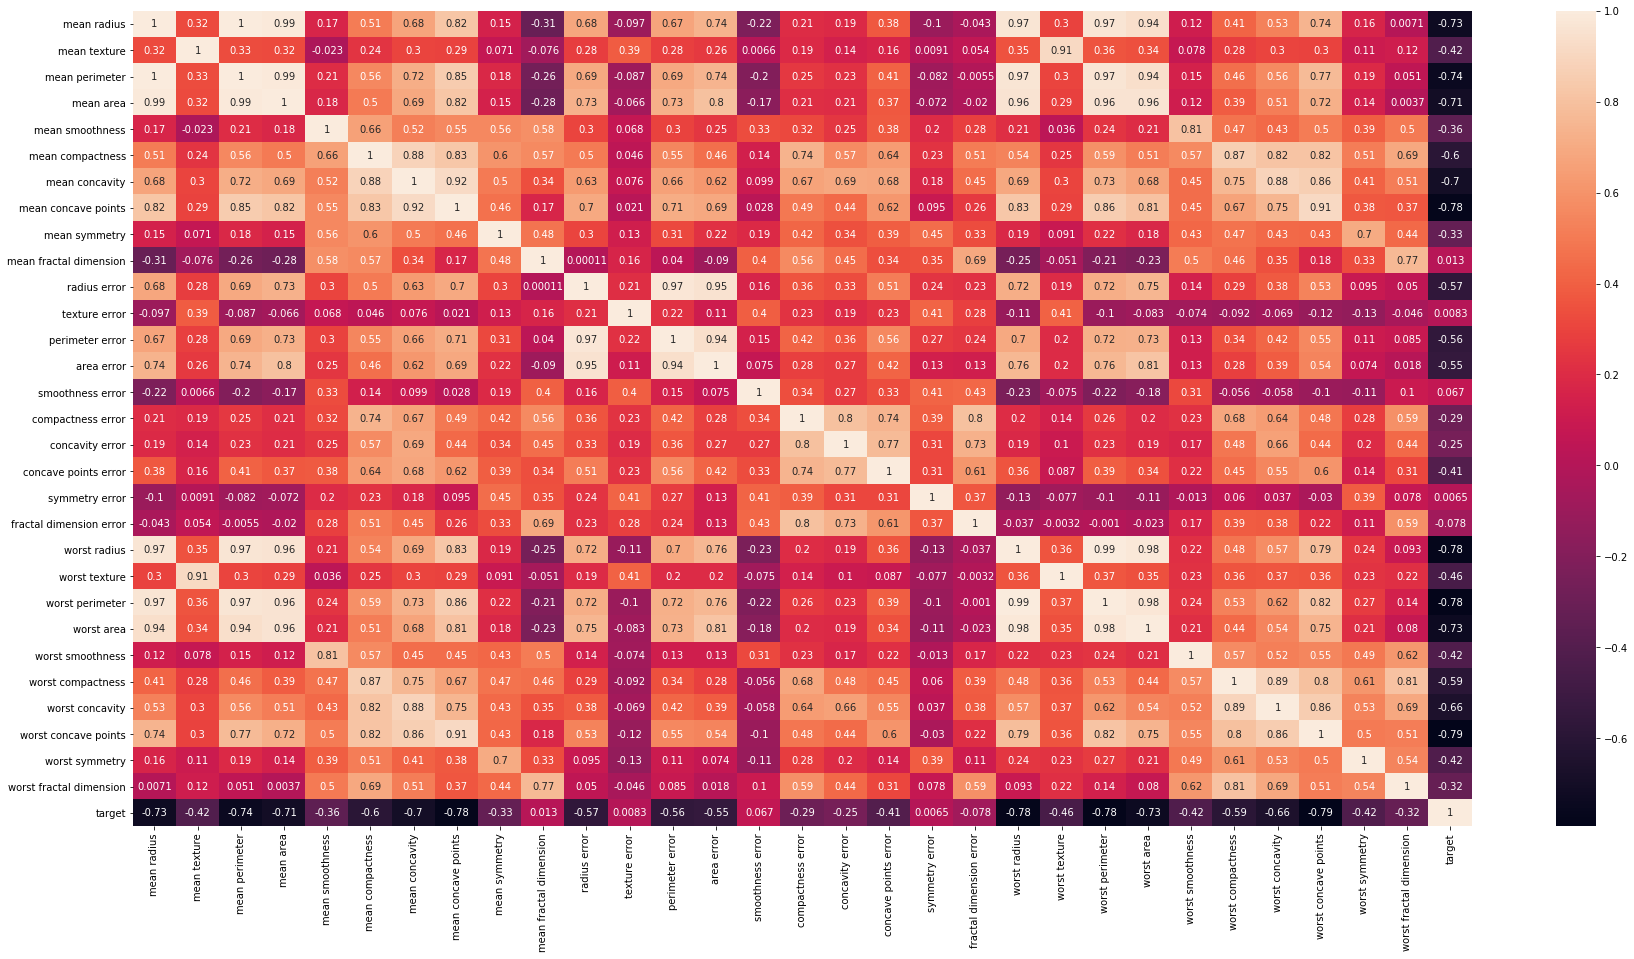

In [16]:
plt.figure(figsize = (30, 15))
sns.heatmap(cancer_df.corr(), annot= True)

Above is the overall view of the correlation of the data. We can see high correlation between certain features (such as mean area and mean perimeter), but also very low correlations between other features (such as mean radius and worst fractal dimension).

That's sufficient data visualization for now. Next, we'll develop the SVM model.

### Model Development

For the first step, the inputs to the model must be defined. For the x value, we need the entire dataframe minus the target value, so we drop it.

In [17]:
x = cancer_df.drop(['target'], axis = 1)

In [18]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We can see that there is no target column.

And for y, we assign the target column.

In [19]:
y = cancer_df['target']

In [20]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

Next, as any good data scientist knows, we need to create a training set and a test set. Here's a quick link explaining this concept: https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7

In [21]:
# Import train_test_split to create our training and testing datasets
from sklearn.model_selection import train_test_split

In [22]:
# Create the training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=3817977913)

We're using a testing data set size of 20% of the original dataset. Test data set size usually falls between 20-30% of the orignal dataset, however with modern neural networks and very large datasets such as those on Hadoop clusters, the test data set size can be dramatically reduced. The random_state is a seed value as there is randomness associated with the train_test_split.

We can take a quick look at the testing and training datasets....

In [23]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
234,9.567,15.91,60.21,279.6,0.08464,0.04087,0.01652,0.01667,0.1551,0.06403,...,10.51,19.16,65.74,335.9,0.1504,0.09515,0.07161,0.07222,0.2757,0.08178
304,11.460,18.16,73.59,403.1,0.08853,0.07694,0.03344,0.01502,0.1411,0.06243,...,12.68,21.61,82.69,489.8,0.1144,0.17890,0.12260,0.05509,0.2208,0.07638
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.14,29.26,85.51,521.7,0.1688,0.26600,0.28730,0.12180,0.2806,0.09097
45,18.650,17.60,123.70,1076.0,0.10990,0.16860,0.19740,0.10090,0.1907,0.06049,...,22.82,21.32,150.60,1567.0,0.1679,0.50900,0.73450,0.23780,0.3799,0.09185
478,11.490,14.59,73.99,404.9,0.10460,0.08228,0.05308,0.01969,0.1779,0.06574,...,12.40,21.90,82.04,467.6,0.1352,0.20100,0.25960,0.07431,0.2941,0.09180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,18.490,17.52,121.30,1068.0,0.10120,0.13170,0.14910,0.09183,0.1832,0.06697,...,22.75,22.88,146.40,1600.0,0.1412,0.30890,0.35330,0.16630,0.2510,0.09445
222,10.180,17.53,65.12,313.1,0.10610,0.08502,0.01768,0.01915,0.1910,0.06908,...,11.17,22.84,71.94,375.6,0.1406,0.14400,0.06572,0.05575,0.3055,0.08797
420,11.570,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,0.2031,0.06267,...,13.07,26.98,86.43,520.5,0.1249,0.19370,0.25600,0.06664,0.3035,0.08284
184,15.280,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,...,17.80,28.03,113.80,973.1,0.1301,0.32990,0.36300,0.12260,0.3175,0.09772


In [24]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
336,12.99,14.23,84.08,514.3,0.09462,0.09965,0.037380,0.020980,0.1652,0.07238,...,13.72,16.91,87.38,576.0,0.1142,0.19750,0.145000,0.05850,0.2432,0.10090
58,13.05,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,...,14.23,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.145000,0.063000,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.1312,0.36350,0.321900,0.11080,0.2827,0.09208
275,11.89,17.36,76.20,435.6,0.12250,0.07210,0.059290,0.074040,0.2015,0.05875,...,12.40,18.99,79.46,472.4,0.1359,0.08368,0.071530,0.08946,0.2220,0.06033
123,14.50,10.89,94.28,640.7,0.11010,0.10990,0.088420,0.057780,0.1856,0.06402,...,15.70,15.98,102.80,745.5,0.1313,0.17880,0.256000,0.12210,0.2889,0.08006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,13.20,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,0.1632,0.05894,...,14.41,20.45,92.00,636.9,0.1128,0.13460,0.011200,0.02500,0.2651,0.08385
72,17.20,24.52,114.20,929.4,0.10710,0.18300,0.169200,0.079440,0.1927,0.06487,...,23.32,33.82,151.60,1681.0,0.1585,0.73940,0.656600,0.18990,0.3313,0.13390
89,14.64,15.24,95.77,651.9,0.11320,0.13390,0.099660,0.070640,0.2116,0.06346,...,16.34,18.24,109.40,803.6,0.1277,0.30890,0.260400,0.13970,0.3151,0.08473
105,13.11,15.56,87.21,530.2,0.13980,0.17650,0.207100,0.096010,0.1925,0.07692,...,16.31,22.40,106.40,827.2,0.1862,0.40990,0.637600,0.19860,0.3147,0.14050


In [25]:
Y_train

234    1.0
304    1.0
106    1.0
45     0.0
478    1.0
      ... 
498    0.0
222    1.0
420    1.0
184    0.0
426    1.0
Name: target, Length: 398, dtype: float64

In [26]:
Y_test

336    1.0
58     1.0
421    1.0
275    1.0
123    1.0
      ... 
306    1.0
72     0.0
89     1.0
105    0.0
223    0.0
Name: target, Length: 171, dtype: float64

Now let's (finally) train the model using the training dataset!

In [27]:
# From the sklearn library, import the svm.SVC object
from sklearn.svm import SVC

In [28]:
# Import metrics tools to evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
# Create SVC object instance
model = SVC()

In [30]:
# Use fit method on the svc_model obj to train the model
model.fit(X_train, Y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

The model is now trained! New data can be fed to the model, and it can predict the classification of tumors.

### Model Evaluation

We're going to now "feed" the model our test datasets, and use the metric tools to evaluate the performance of the model.

In [31]:
# Use the model.predict() method to generate classifications on the X_test data
y_pred = model.predict(X_test)

In [32]:
y_pred

array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       0.])

Now, we can use a confusion matrix to compare the y_pred with the y_test data, evaluating the accuracy of the model, as well as the false positive and false negative rates of the model.

In [33]:
# Create the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

We can use the Seaborn library to create a heatmap to view visualize the confusion matrix.

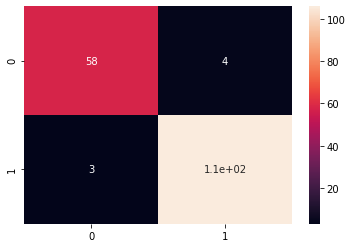

In [34]:
sns.heatmap(conf_matrix, annot=True)

We can see in the confusion matrix that there are 58 correctly labelled malignant tumors and 110 correctly labelled benign tumors. We can also see that there are four false positive instances (four benign tumors were classified as malignant tumors) and three false negative (three malignant tumors were classified as benign).

We can quickly evaluate the overall accuracy of the model with this test set data.

In [35]:
accuracy = (conf_matrix[0][0] + conf_matrix[1][1]) / (conf_matrix[0][0] + conf_matrix[0][1] + conf_matrix[1][0] + conf_matrix[1][1])
print (f'''\tThe model achieved an accuracy of {accuracy*100}% prior to any optimization efforts. 
        This is {accuracy*100-79:.2f}% greater than that of an average physician.''')

	The model achieved an accuracy of 95.90643274853801% prior to any optimization efforts. 
        This is 16.91% greater than that of an average physician.


### Improving the Model

#### Data Normalization

We're going to normalize our data to see if that can improve the model performance. This can be done with feature scaling. By doing Unity-based normalization, all the data values will be brought into a range between 0 and 1.

#### SVM Parameter Optimization

We can perform parameter tuning to also optimize the model performance. For SVM, we can tune the "C parameter". The C parameter controls the trade-off between classifying training points correctly and having a smooth decision boundary. 
- At Small C (loose) the cost (penalty) of misclassification is low (soft margin).
- At Large C (strict) the cost of misclassification is high (hard margin), which can lead to overfitting.  
  
The idea is to find the ideal "inbetween" C value that gives the best optimization while not overfitting or being too lax.

We can also tune the "Gamma parameter". The Gamma parameter controls how far the influence of a single training set reaches.
- A large gamma corresponds to a close reach (the closer data points have very high weight).
- A small gamma corresponds to a far reach (this produces a more generalized solution).

##### Implementing Normalization

In [36]:
# Get minimum value of X_train feature data
min_train = X_train.min()

In [37]:
# Get range of X_train feature data
range_train = (X_train-min_train).max()

In [38]:
# Implement scaling
Scaled_X_train = (X_train - min_train) / range_train

Let's double check that the normalization has been correctly implemented.

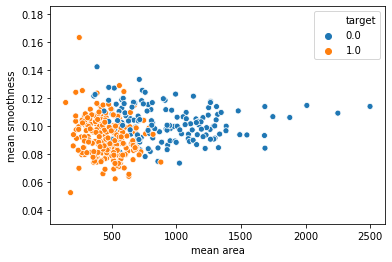

In [39]:
sns.scatterplot(x = X_train['mean area'], y = X_train['mean smoothness'], hue=Y_train)

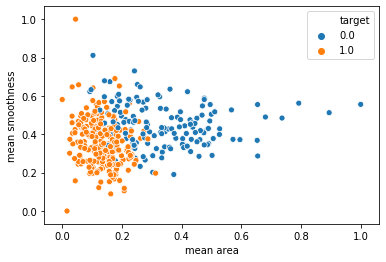

In [40]:
sns.scatterplot(x = Scaled_X_train['mean area'], y = Scaled_X_train['mean smoothness'], hue=Y_train)

We can see that the range is now between 0 and 1 for the features.

So the normalization needs to be performed on the test data set...

In [41]:
min_test = X_test.min()
range_test = (X_test-min_test).max()
Scaled_X_test = (X_test - min_test) / range_test

And now we re-train the model but we use the normalized train and test data.

In [42]:
model = SVC()
model.fit(Scaled_X_train, Y_train)
y_pred = model.predict(Scaled_X_test)
conf_matrix = confusion_matrix(Y_test, y_pred)

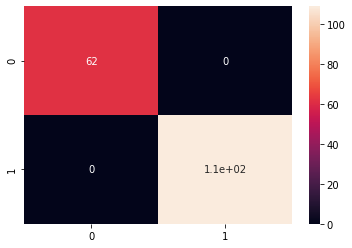

In [43]:
sns.heatmap(conf_matrix, annot=True)

In [44]:
accuracy = (conf_matrix[0][0] + conf_matrix[1][1]) / (conf_matrix[0][0] + conf_matrix[0][1] + conf_matrix[1][0] + conf_matrix[1][1])
print (f'''\tThe model achieved an accuracy of {accuracy*100}%. 
        This is {accuracy*100-79:.2f}% greater than that of an average physician.''')

	The model achieved an accuracy of 100.0%. 
        This is 21.00% greater than that of an average physician.


Following normalization, 100% accuracy was achieved. 

We can now print out the classification report (from when we imported the metrics tools).

In [45]:
print(classification_report(Y_test , y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        62
         1.0       1.00      1.00      1.00       109

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



##### Parameter Tuning

Despite achieving 100% accuracy, it is likely that the model can still be tuned to be better. The results may not be reflective in this dataset, but with new data could be.

Parameter tuning is more of an art than strictly normalizing. How does one select the "best" parameters for a model?

SKLearn has a method which can be used with SVMs to do this for us! We can supply various parameters that SVM will test to achieve the best model.

In [46]:
# Define the parameter range which will be used to optimize parameters
param_grid = {'C': np.arange(0, 100, 1), 'gamma': np.arange(0.001, 1, 0.05), 'kernel': ['rbf']}

In [47]:
# Import grid search
from sklearn.model_selection import GridSearchCV

In [48]:
# Use grid search to search within our parameter grid
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=4)

In [49]:
# Fit the grid to apply the parameters
grid.fit(Scaled_X_train, Y_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
[CV] C=0, gamma=0.001, kernel=rbf ....................................
[CV] .......... C=0, gamma=0.001, kernel=rbf, score=nan, total=   0.0s
[CV] C=0, gamma=0.001, kernel=rbf ....................................
[CV] .......... C=0, gamma=0.001, kernel=rbf, score=nan, total=   0.0s
[CV] C=0, gamma=0.001, kernel=rbf ....................................
[CV] .......... C=0, gamma=0.001, kernel=rbf, score=nan, total=   0.0s
[CV] C=0, gamma=0.001, kernel=rbf ....................................
[CV] .......... C=0, gamma=0.001, kernel=rbf, score=nan, total=   0.0s
[CV] C=0, gamma=0.001, kernel=rbf ....................................
[CV] .......... C=0, gamma=0.001, kernel=rbf, score=nan, total=   0.0s
[CV] C=0, gamma=0.051000000000000004, kernel=rbf .....................
[CV]  C=0, gamma=0.051000000000000004, kernel=rbf, score=nan, total=   0.0s
[CV] C=0, gamma=0.051000000000000004, kernel=rbf .....................
[CV]  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Wil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\Wil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\Wil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedWar

[CV]  C=0, gamma=0.9510000000000001, kernel=rbf, score=nan, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.625, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.625, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.625, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.620, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.620, total=   0.0s
[CV] C=1, gamma=0.051000000000000004, kernel=rbf .....................
[CV]  C=1, gamma=0.051000000000000004, kernel=rbf, score=0.912, total=   0.0s
[CV] C=1, gamma=0.051000000000000004, kernel=rbf ..................

[CV] ........ C=1, gamma=0.551, kernel=rbf, score=0.975, total=   0.0s
[CV] C=1, gamma=0.551, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.551, kernel=rbf, score=0.949, total=   0.0s
[CV] C=1, gamma=0.6010000000000001, kernel=rbf .......................
[CV]  C=1, gamma=0.6010000000000001, kernel=rbf, score=0.963, total=   0.0s
[CV] C=1, gamma=0.6010000000000001, kernel=rbf .......................
[CV]  C=1, gamma=0.6010000000000001, kernel=rbf, score=0.963, total=   0.0s
[CV] C=1, gamma=0.6010000000000001, kernel=rbf .......................
[CV]  C=1, gamma=0.6010000000000001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=1, gamma=0.6010000000000001, kernel=rbf .......................
[CV]  C=1, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=1, gamma=0.6010000000000001, kernel=rbf .......................
[CV]  C=1, gamma=0.6010000000000001, kernel=rbf, score=0.962, total=   0.0s
[CV] C=1, gamma=0.651, kernel=rbf ..................

[CV] ........ C=2, gamma=0.651, kernel=rbf, score=0.975, total=   0.0s
[CV] C=2, gamma=0.651, kernel=rbf ....................................
[CV] ........ C=2, gamma=0.651, kernel=rbf, score=0.962, total=   0.0s
[CV] C=2, gamma=0.7010000000000001, kernel=rbf .......................
[CV]  C=2, gamma=0.7010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=2, gamma=0.7010000000000001, kernel=rbf .......................
[CV]  C=2, gamma=0.7010000000000001, kernel=rbf, score=0.963, total=   0.0s
[CV] C=2, gamma=0.7010000000000001, kernel=rbf .......................
[CV]  C=2, gamma=0.7010000000000001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=2, gamma=0.7010000000000001, kernel=rbf .......................
[CV]  C=2, gamma=0.7010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=2, gamma=0.7010000000000001, kernel=rbf .......................
[CV]  C=2, gamma=0.7010000000000001, kernel=rbf, score=0.962, total=   0.0s
[CV] C=2, gamma=0.751, kernel=rbf ..................

[CV] ........ C=3, gamma=0.251, kernel=rbf, score=0.975, total=   0.0s
[CV] C=3, gamma=0.251, kernel=rbf ....................................
[CV] ........ C=3, gamma=0.251, kernel=rbf, score=0.975, total=   0.0s
[CV] C=3, gamma=0.251, kernel=rbf ....................................
[CV] ........ C=3, gamma=0.251, kernel=rbf, score=0.950, total=   0.0s
[CV] C=3, gamma=0.251, kernel=rbf ....................................
[CV] ........ C=3, gamma=0.251, kernel=rbf, score=0.975, total=   0.0s
[CV] C=3, gamma=0.251, kernel=rbf ....................................
[CV] ........ C=3, gamma=0.251, kernel=rbf, score=0.949, total=   0.0s
[CV] C=3, gamma=0.30100000000000005, kernel=rbf ......................
[CV]  C=3, gamma=0.30100000000000005, kernel=rbf, score=0.975, total=   0.0s
[CV] C=3, gamma=0.30100000000000005, kernel=rbf ......................
[CV]  C=3, gamma=0.30100000000000005, kernel=rbf, score=0.975, total=   0.0s
[CV] C=3, gamma=0.30100000000000005, kernel=rbf .................

[CV] ........ C=3, gamma=0.801, kernel=rbf, score=0.962, total=   0.0s
[CV] C=3, gamma=0.8510000000000001, kernel=rbf .......................
[CV]  C=3, gamma=0.8510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=3, gamma=0.8510000000000001, kernel=rbf .......................
[CV]  C=3, gamma=0.8510000000000001, kernel=rbf, score=0.963, total=   0.0s
[CV] C=3, gamma=0.8510000000000001, kernel=rbf .......................
[CV]  C=3, gamma=0.8510000000000001, kernel=rbf, score=0.963, total=   0.0s
[CV] C=3, gamma=0.8510000000000001, kernel=rbf .......................
[CV]  C=3, gamma=0.8510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=3, gamma=0.8510000000000001, kernel=rbf .......................
[CV]  C=3, gamma=0.8510000000000001, kernel=rbf, score=0.962, total=   0.0s
[CV] C=3, gamma=0.901, kernel=rbf ....................................
[CV] ........ C=3, gamma=0.901, kernel=rbf, score=0.975, total=   0.0s
[CV] C=3, gamma=0.901, kernel=rbf ..................

[CV] ........ C=4, gamma=0.901, kernel=rbf, score=0.975, total=   0.0s
[CV] C=4, gamma=0.901, kernel=rbf ....................................
[CV] ........ C=4, gamma=0.901, kernel=rbf, score=0.975, total=   0.0s
[CV] C=4, gamma=0.901, kernel=rbf ....................................
[CV] ........ C=4, gamma=0.901, kernel=rbf, score=0.963, total=   0.0s
[CV] C=4, gamma=0.901, kernel=rbf ....................................
[CV] ........ C=4, gamma=0.901, kernel=rbf, score=0.975, total=   0.0s
[CV] C=4, gamma=0.901, kernel=rbf ....................................
[CV] ........ C=4, gamma=0.901, kernel=rbf, score=0.962, total=   0.0s
[CV] C=4, gamma=0.9510000000000001, kernel=rbf .......................
[CV]  C=4, gamma=0.9510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=4, gamma=0.9510000000000001, kernel=rbf .......................
[CV]  C=4, gamma=0.9510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=4, gamma=0.9510000000000001, kernel=rbf ....................

[CV] ........ C=5, gamma=0.501, kernel=rbf, score=0.963, total=   0.0s
[CV] C=5, gamma=0.501, kernel=rbf ....................................
[CV] ........ C=5, gamma=0.501, kernel=rbf, score=0.975, total=   0.0s
[CV] C=5, gamma=0.501, kernel=rbf ....................................
[CV] ........ C=5, gamma=0.501, kernel=rbf, score=0.975, total=   0.0s
[CV] C=5, gamma=0.501, kernel=rbf ....................................
[CV] ........ C=5, gamma=0.501, kernel=rbf, score=0.962, total=   0.0s
[CV] C=5, gamma=0.551, kernel=rbf ....................................
[CV] ........ C=5, gamma=0.551, kernel=rbf, score=0.975, total=   0.0s
[CV] C=5, gamma=0.551, kernel=rbf ....................................
[CV] ........ C=5, gamma=0.551, kernel=rbf, score=0.963, total=   0.0s
[CV] C=5, gamma=0.551, kernel=rbf ....................................
[CV] ........ C=5, gamma=0.551, kernel=rbf, score=0.975, total=   0.0s
[CV] C=5, gamma=0.551, kernel=rbf ....................................
[CV] .

[CV]  C=6, gamma=0.051000000000000004, kernel=rbf, score=0.975, total=   0.0s
[CV] C=6, gamma=0.051000000000000004, kernel=rbf .....................
[CV]  C=6, gamma=0.051000000000000004, kernel=rbf, score=0.962, total=   0.0s
[CV] C=6, gamma=0.101, kernel=rbf ....................................
[CV] ........ C=6, gamma=0.101, kernel=rbf, score=0.975, total=   0.0s
[CV] C=6, gamma=0.101, kernel=rbf ....................................
[CV] ........ C=6, gamma=0.101, kernel=rbf, score=0.950, total=   0.0s
[CV] C=6, gamma=0.101, kernel=rbf ....................................
[CV] ........ C=6, gamma=0.101, kernel=rbf, score=0.963, total=   0.0s
[CV] C=6, gamma=0.101, kernel=rbf ....................................
[CV] ........ C=6, gamma=0.101, kernel=rbf, score=0.975, total=   0.0s
[CV] C=6, gamma=0.101, kernel=rbf ....................................
[CV] ........ C=6, gamma=0.101, kernel=rbf, score=0.949, total=   0.0s
[CV] C=6, gamma=0.15100000000000002, kernel=rbf ...............

[CV] ........ C=6, gamma=0.651, kernel=rbf, score=0.962, total=   0.0s
[CV] C=6, gamma=0.7010000000000001, kernel=rbf .......................
[CV]  C=6, gamma=0.7010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=6, gamma=0.7010000000000001, kernel=rbf .......................
[CV]  C=6, gamma=0.7010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=6, gamma=0.7010000000000001, kernel=rbf .......................
[CV]  C=6, gamma=0.7010000000000001, kernel=rbf, score=0.963, total=   0.0s
[CV] C=6, gamma=0.7010000000000001, kernel=rbf .......................
[CV]  C=6, gamma=0.7010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=6, gamma=0.7010000000000001, kernel=rbf .......................
[CV]  C=6, gamma=0.7010000000000001, kernel=rbf, score=0.962, total=   0.0s
[CV] C=6, gamma=0.751, kernel=rbf ....................................
[CV] ........ C=6, gamma=0.751, kernel=rbf, score=0.975, total=   0.0s
[CV] C=6, gamma=0.751, kernel=rbf ..................

[CV] ........ C=7, gamma=0.251, kernel=rbf, score=0.950, total=   0.0s
[CV] C=7, gamma=0.251, kernel=rbf ....................................
[CV] ........ C=7, gamma=0.251, kernel=rbf, score=0.963, total=   0.0s
[CV] C=7, gamma=0.251, kernel=rbf ....................................
[CV] ........ C=7, gamma=0.251, kernel=rbf, score=0.975, total=   0.0s
[CV] C=7, gamma=0.251, kernel=rbf ....................................
[CV] ........ C=7, gamma=0.251, kernel=rbf, score=0.962, total=   0.0s
[CV] C=7, gamma=0.30100000000000005, kernel=rbf ......................
[CV]  C=7, gamma=0.30100000000000005, kernel=rbf, score=0.975, total=   0.0s
[CV] C=7, gamma=0.30100000000000005, kernel=rbf ......................
[CV]  C=7, gamma=0.30100000000000005, kernel=rbf, score=0.950, total=   0.0s
[CV] C=7, gamma=0.30100000000000005, kernel=rbf ......................
[CV]  C=7, gamma=0.30100000000000005, kernel=rbf, score=0.963, total=   0.0s
[CV] C=7, gamma=0.30100000000000005, kernel=rbf ...........

[CV]  C=7, gamma=0.8510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=7, gamma=0.8510000000000001, kernel=rbf .......................
[CV]  C=7, gamma=0.8510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=7, gamma=0.8510000000000001, kernel=rbf .......................
[CV]  C=7, gamma=0.8510000000000001, kernel=rbf, score=0.963, total=   0.0s
[CV] C=7, gamma=0.8510000000000001, kernel=rbf .......................
[CV]  C=7, gamma=0.8510000000000001, kernel=rbf, score=0.987, total=   0.0s
[CV] C=7, gamma=0.8510000000000001, kernel=rbf .......................
[CV]  C=7, gamma=0.8510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=7, gamma=0.901, kernel=rbf ....................................
[CV] ........ C=7, gamma=0.901, kernel=rbf, score=0.975, total=   0.0s
[CV] C=7, gamma=0.901, kernel=rbf ....................................
[CV] ........ C=7, gamma=0.901, kernel=rbf, score=0.975, total=   0.0s
[CV] C=7, gamma=0.901, kernel=rbf ..................

[CV] ........ C=8, gamma=0.401, kernel=rbf, score=0.963, total=   0.0s
[CV] C=8, gamma=0.401, kernel=rbf ....................................
[CV] ........ C=8, gamma=0.401, kernel=rbf, score=0.975, total=   0.0s
[CV] C=8, gamma=0.401, kernel=rbf ....................................
[CV] ........ C=8, gamma=0.401, kernel=rbf, score=0.962, total=   0.0s
[CV] C=8, gamma=0.451, kernel=rbf ....................................
[CV] ........ C=8, gamma=0.451, kernel=rbf, score=0.975, total=   0.0s
[CV] C=8, gamma=0.451, kernel=rbf ....................................
[CV] ........ C=8, gamma=0.451, kernel=rbf, score=0.963, total=   0.0s
[CV] C=8, gamma=0.451, kernel=rbf ....................................
[CV] ........ C=8, gamma=0.451, kernel=rbf, score=0.963, total=   0.0s
[CV] C=8, gamma=0.451, kernel=rbf ....................................
[CV] ........ C=8, gamma=0.451, kernel=rbf, score=0.975, total=   0.0s
[CV] C=8, gamma=0.451, kernel=rbf ....................................
[CV] .

[CV] ........ C=9, gamma=0.001, kernel=rbf, score=0.912, total=   0.0s
[CV] C=9, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=9, gamma=0.001, kernel=rbf, score=0.900, total=   0.0s
[CV] C=9, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=9, gamma=0.001, kernel=rbf, score=0.886, total=   0.0s
[CV] C=9, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=9, gamma=0.001, kernel=rbf, score=0.899, total=   0.0s
[CV] C=9, gamma=0.051000000000000004, kernel=rbf .....................
[CV]  C=9, gamma=0.051000000000000004, kernel=rbf, score=0.963, total=   0.0s
[CV] C=9, gamma=0.051000000000000004, kernel=rbf .....................
[CV]  C=9, gamma=0.051000000000000004, kernel=rbf, score=0.938, total=   0.0s
[CV] C=9, gamma=0.051000000000000004, kernel=rbf .....................
[CV]  C=9, gamma=0.051000000000000004, kernel=rbf, score=0.963, total=   0.0s
[CV] C=9, gamma=0.051000000000000004, kernel=rbf .......

[CV]  C=9, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=9, gamma=0.6010000000000001, kernel=rbf .......................
[CV]  C=9, gamma=0.6010000000000001, kernel=rbf, score=0.963, total=   0.0s
[CV] C=9, gamma=0.6010000000000001, kernel=rbf .......................
[CV]  C=9, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=9, gamma=0.6010000000000001, kernel=rbf .......................
[CV]  C=9, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=9, gamma=0.651, kernel=rbf ....................................
[CV] ........ C=9, gamma=0.651, kernel=rbf, score=0.975, total=   0.0s
[CV] C=9, gamma=0.651, kernel=rbf ....................................
[CV] ........ C=9, gamma=0.651, kernel=rbf, score=0.975, total=   0.0s
[CV] C=9, gamma=0.651, kernel=rbf ....................................
[CV] ........ C=9, gamma=0.651, kernel=rbf, score=0.963, total=   0.0s
[CV] C=9, gamma=0.651, kernel=rbf .......................

[CV]  C=10, gamma=0.15100000000000002, kernel=rbf, score=0.975, total=   0.0s
[CV] C=10, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=10, gamma=0.15100000000000002, kernel=rbf, score=0.962, total=   0.0s
[CV] C=10, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.201, kernel=rbf, score=0.975, total=   0.0s
[CV] C=10, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.201, kernel=rbf, score=0.938, total=   0.0s
[CV] C=10, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.201, kernel=rbf, score=0.963, total=   0.0s
[CV] C=10, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.201, kernel=rbf, score=0.975, total=   0.0s
[CV] C=10, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.201, kernel=rbf, score=0.962, total=   0.0s
[CV] C=10, gamma=0.251, kernel=rbf ............................

[CV] ....... C=10, gamma=0.751, kernel=rbf, score=0.975, total=   0.0s
[CV] C=10, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.751, kernel=rbf, score=0.975, total=   0.0s
[CV] C=10, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.751, kernel=rbf, score=0.950, total=   0.0s
[CV] C=10, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.751, kernel=rbf, score=0.987, total=   0.0s
[CV] C=10, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.751, kernel=rbf, score=0.975, total=   0.0s
[CV] C=10, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.801, kernel=rbf, score=0.975, total=   0.0s
[CV] C=10, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.801, kernel=rbf, score=0.975, total=   0.0s
[CV] C=10, gamma=0.801, kernel=rbf ...................................
[CV] .

[CV]  C=11, gamma=0.30100000000000005, kernel=rbf, score=0.962, total=   0.0s
[CV] C=11, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=11, gamma=0.35100000000000003, kernel=rbf, score=0.975, total=   0.0s
[CV] C=11, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=11, gamma=0.35100000000000003, kernel=rbf, score=0.963, total=   0.0s
[CV] C=11, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=11, gamma=0.35100000000000003, kernel=rbf, score=0.963, total=   0.0s
[CV] C=11, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=11, gamma=0.35100000000000003, kernel=rbf, score=0.975, total=   0.0s
[CV] C=11, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=11, gamma=0.35100000000000003, kernel=rbf, score=0.975, total=   0.0s
[CV] C=11, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=11, gamma=0.401, kernel=rbf, score=0.975, total=   0.0s
[CV] C=11, gamma=0.401, kernel=rbf 

[CV]  C=11, gamma=0.9510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=11, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=11, gamma=0.9510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=11, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=11, gamma=0.9510000000000001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=11, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=11, gamma=0.9510000000000001, kernel=rbf, score=0.987, total=   0.0s
[CV] C=11, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=11, gamma=0.9510000000000001, kernel=rbf, score=0.987, total=   0.0s
[CV] C=12, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=12, gamma=0.001, kernel=rbf, score=0.850, total=   0.0s
[CV] C=12, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=12, gamma=0.001, kernel=rbf, score=0.912, total=   0.0s
[CV] C=12, gamma=0.001, kernel=rbf ............

[CV] ....... C=12, gamma=0.501, kernel=rbf, score=0.975, total=   0.0s
[CV] C=12, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=12, gamma=0.501, kernel=rbf, score=0.975, total=   0.0s
[CV] C=12, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=12, gamma=0.551, kernel=rbf, score=0.975, total=   0.0s
[CV] C=12, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=12, gamma=0.551, kernel=rbf, score=0.975, total=   0.0s
[CV] C=12, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=12, gamma=0.551, kernel=rbf, score=0.963, total=   0.0s
[CV] C=12, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=12, gamma=0.551, kernel=rbf, score=0.975, total=   0.0s
[CV] C=12, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=12, gamma=0.551, kernel=rbf, score=0.975, total=   0.0s
[CV] C=12, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  

[CV] ....... C=13, gamma=0.101, kernel=rbf, score=0.950, total=   0.0s
[CV] C=13, gamma=0.101, kernel=rbf ...................................
[CV] ....... C=13, gamma=0.101, kernel=rbf, score=0.975, total=   0.0s
[CV] C=13, gamma=0.101, kernel=rbf ...................................
[CV] ....... C=13, gamma=0.101, kernel=rbf, score=0.975, total=   0.0s
[CV] C=13, gamma=0.101, kernel=rbf ...................................
[CV] ....... C=13, gamma=0.101, kernel=rbf, score=0.962, total=   0.0s
[CV] C=13, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=13, gamma=0.15100000000000002, kernel=rbf, score=0.975, total=   0.0s
[CV] C=13, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=13, gamma=0.15100000000000002, kernel=rbf, score=0.938, total=   0.0s
[CV] C=13, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=13, gamma=0.15100000000000002, kernel=rbf, score=0.963, total=   0.0s
[CV] C=13, gamma=0.15100000000000002, kernel=rbf .......

[CV]  C=13, gamma=0.7010000000000001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=13, gamma=0.7010000000000001, kernel=rbf ......................
[CV]  C=13, gamma=0.7010000000000001, kernel=rbf, score=0.987, total=   0.0s
[CV] C=13, gamma=0.7010000000000001, kernel=rbf ......................
[CV]  C=13, gamma=0.7010000000000001, kernel=rbf, score=0.987, total=   0.0s
[CV] C=13, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=13, gamma=0.751, kernel=rbf, score=0.975, total=   0.0s
[CV] C=13, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=13, gamma=0.751, kernel=rbf, score=0.975, total=   0.0s
[CV] C=13, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=13, gamma=0.751, kernel=rbf, score=0.950, total=   0.0s
[CV] C=13, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=13, gamma=0.751, kernel=rbf, score=0.987, total=   0.0s
[CV] C=13, gamma=0.751, kernel=rbf ........................

[CV] ....... C=14, gamma=0.751, kernel=rbf, score=0.987, total=   0.0s
[CV] C=14, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=14, gamma=0.751, kernel=rbf, score=0.987, total=   0.0s
[CV] C=14, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=14, gamma=0.801, kernel=rbf, score=0.975, total=   0.0s
[CV] C=14, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=14, gamma=0.801, kernel=rbf, score=0.975, total=   0.0s
[CV] C=14, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=14, gamma=0.801, kernel=rbf, score=0.950, total=   0.0s
[CV] C=14, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=14, gamma=0.801, kernel=rbf, score=0.987, total=   0.0s
[CV] C=14, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=14, gamma=0.801, kernel=rbf, score=0.987, total=   0.0s
[CV] C=14, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  

[CV]  C=15, gamma=0.35100000000000003, kernel=rbf, score=0.963, total=   0.0s
[CV] C=15, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=15, gamma=0.35100000000000003, kernel=rbf, score=0.975, total=   0.0s
[CV] C=15, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=15, gamma=0.35100000000000003, kernel=rbf, score=0.975, total=   0.0s
[CV] C=15, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=15, gamma=0.401, kernel=rbf, score=0.975, total=   0.0s
[CV] C=15, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=15, gamma=0.401, kernel=rbf, score=0.975, total=   0.0s
[CV] C=15, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=15, gamma=0.401, kernel=rbf, score=0.963, total=   0.0s
[CV] C=15, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=15, gamma=0.401, kernel=rbf, score=0.975, total=   0.0s
[CV] C=15, gamma=0.401, kernel=rbf .....................

[CV] ....... C=16, gamma=0.401, kernel=rbf, score=0.975, total=   0.0s
[CV] C=16, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=16, gamma=0.401, kernel=rbf, score=0.975, total=   0.0s
[CV] C=16, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=16, gamma=0.451, kernel=rbf, score=0.975, total=   0.0s
[CV] C=16, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=16, gamma=0.451, kernel=rbf, score=0.975, total=   0.0s
[CV] C=16, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=16, gamma=0.451, kernel=rbf, score=0.963, total=   0.0s
[CV] C=16, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=16, gamma=0.451, kernel=rbf, score=0.975, total=   0.0s
[CV] C=16, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=16, gamma=0.451, kernel=rbf, score=0.975, total=   0.0s
[CV] C=16, gamma=0.501, kernel=rbf ...................................
[CV] .

[CV] ....... C=17, gamma=0.001, kernel=rbf, score=0.925, total=   0.0s
[CV] C=17, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=17, gamma=0.001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=17, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=17, gamma=0.001, kernel=rbf, score=0.949, total=   0.0s
[CV] C=17, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=17, gamma=0.001, kernel=rbf, score=0.924, total=   0.0s
[CV] C=17, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=17, gamma=0.051000000000000004, kernel=rbf, score=0.975, total=   0.0s
[CV] C=17, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=17, gamma=0.051000000000000004, kernel=rbf, score=0.950, total=   0.0s
[CV] C=17, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=17, gamma=0.051000000000000004, kernel=rbf, score=0.975, total=   0.0s
[CV] C=17, gamma=0.051000000000000004, kernel=rbf ...

[CV]  C=17, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=17, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=17, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=17, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=17, gamma=0.6010000000000001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=17, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=17, gamma=0.6010000000000001, kernel=rbf, score=0.987, total=   0.0s
[CV] C=17, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=17, gamma=0.6010000000000001, kernel=rbf, score=0.987, total=   0.0s
[CV] C=17, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=17, gamma=0.651, kernel=rbf, score=0.975, total=   0.0s
[CV] C=17, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=17, gamma=0.651, kernel=rbf, score=0.975, total=   0.0s
[CV] C=17, gamma=0.651, kernel=rbf ............

[CV]  C=18, gamma=0.15100000000000002, kernel=rbf, score=0.950, total=   0.0s
[CV] C=18, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=18, gamma=0.15100000000000002, kernel=rbf, score=0.975, total=   0.0s
[CV] C=18, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=18, gamma=0.15100000000000002, kernel=rbf, score=0.962, total=   0.0s
[CV] C=18, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=18, gamma=0.201, kernel=rbf, score=0.975, total=   0.0s
[CV] C=18, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=18, gamma=0.201, kernel=rbf, score=0.950, total=   0.0s
[CV] C=18, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=18, gamma=0.201, kernel=rbf, score=0.963, total=   0.0s
[CV] C=18, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=18, gamma=0.201, kernel=rbf, score=0.975, total=   0.0s
[CV] C=18, gamma=0.201, kernel=rbf .....................

[CV] ....... C=18, gamma=0.751, kernel=rbf, score=0.975, total=   0.0s
[CV] C=18, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=18, gamma=0.751, kernel=rbf, score=0.950, total=   0.0s
[CV] C=18, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=18, gamma=0.751, kernel=rbf, score=0.987, total=   0.0s
[CV] C=18, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=18, gamma=0.751, kernel=rbf, score=0.987, total=   0.0s
[CV] C=18, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=18, gamma=0.801, kernel=rbf, score=0.975, total=   0.0s
[CV] C=18, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=18, gamma=0.801, kernel=rbf, score=0.988, total=   0.0s
[CV] C=18, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=18, gamma=0.801, kernel=rbf, score=0.950, total=   0.0s
[CV] C=18, gamma=0.801, kernel=rbf ...................................
[CV] .

[CV]  C=19, gamma=0.30100000000000005, kernel=rbf, score=0.975, total=   0.0s
[CV] C=19, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=19, gamma=0.30100000000000005, kernel=rbf, score=0.975, total=   0.0s
[CV] C=19, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=19, gamma=0.35100000000000003, kernel=rbf, score=0.975, total=   0.0s
[CV] C=19, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=19, gamma=0.35100000000000003, kernel=rbf, score=0.975, total=   0.0s
[CV] C=19, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=19, gamma=0.35100000000000003, kernel=rbf, score=0.963, total=   0.0s
[CV] C=19, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=19, gamma=0.35100000000000003, kernel=rbf, score=0.975, total=   0.0s
[CV] C=19, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=19, gamma=0.35100000000000003, kernel=rbf, score=0.975, total=   0.0s
[CV] C=19, gamma=0.401, kern

[CV] ....... C=19, gamma=0.901, kernel=rbf, score=0.988, total=   0.0s
[CV] C=19, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=19, gamma=0.901, kernel=rbf, score=0.950, total=   0.0s
[CV] C=19, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=19, gamma=0.901, kernel=rbf, score=0.987, total=   0.0s
[CV] C=19, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=19, gamma=0.901, kernel=rbf, score=0.987, total=   0.0s
[CV] C=19, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=19, gamma=0.9510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=19, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=19, gamma=0.9510000000000001, kernel=rbf, score=0.988, total=   0.0s
[CV] C=19, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=19, gamma=0.9510000000000001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=19, gamma=0.9510000000000001, kernel=rbf ...........

[CV] ....... C=21, gamma=0.001, kernel=rbf, score=0.900, total=   0.0s
[CV] C=21, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=21, gamma=0.001, kernel=rbf, score=0.925, total=   0.0s
[CV] C=21, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=21, gamma=0.001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=21, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=21, gamma=0.001, kernel=rbf, score=0.949, total=   0.0s
[CV] C=21, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=21, gamma=0.001, kernel=rbf, score=0.924, total=   0.0s
[CV] C=21, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=21, gamma=0.051000000000000004, kernel=rbf, score=0.975, total=   0.0s
[CV] C=21, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=21, gamma=0.051000000000000004, kernel=rbf, score=0.950, total=   0.0s
[CV] C=21, gamma=0.051000000000000004, kernel=rbf ...........

[CV] ....... C=21, gamma=0.551, kernel=rbf, score=0.950, total=   0.0s
[CV] C=21, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=21, gamma=0.551, kernel=rbf, score=0.987, total=   0.0s
[CV] C=21, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=21, gamma=0.551, kernel=rbf, score=0.987, total=   0.0s
[CV] C=21, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=21, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=21, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=21, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=21, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=21, gamma=0.6010000000000001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=21, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=21, gamma=0.6010000000000001, kernel=rbf, score=0.987, total=   0.0s
[CV] C=21, gamma=0.6010000000000001, kernel=rbf .....

[CV] ....... C=22, gamma=0.101, kernel=rbf, score=0.962, total=   0.0s
[CV] C=22, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=22, gamma=0.15100000000000002, kernel=rbf, score=0.975, total=   0.0s
[CV] C=22, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=22, gamma=0.15100000000000002, kernel=rbf, score=0.938, total=   0.0s
[CV] C=22, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=22, gamma=0.15100000000000002, kernel=rbf, score=0.963, total=   0.0s
[CV] C=22, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=22, gamma=0.15100000000000002, kernel=rbf, score=0.975, total=   0.0s
[CV] C=22, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=22, gamma=0.15100000000000002, kernel=rbf, score=0.962, total=   0.0s
[CV] C=22, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=22, gamma=0.201, kernel=rbf, score=0.975, total=   0.0s
[CV] C=22, gamma=0.201, kernel=rbf .......

[CV]  C=22, gamma=0.7010000000000001, kernel=rbf, score=0.987, total=   0.0s
[CV] C=22, gamma=0.7010000000000001, kernel=rbf ......................
[CV]  C=22, gamma=0.7010000000000001, kernel=rbf, score=0.987, total=   0.0s
[CV] C=22, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=22, gamma=0.751, kernel=rbf, score=0.975, total=   0.0s
[CV] C=22, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=22, gamma=0.751, kernel=rbf, score=0.988, total=   0.0s
[CV] C=22, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=22, gamma=0.751, kernel=rbf, score=0.950, total=   0.0s
[CV] C=22, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=22, gamma=0.751, kernel=rbf, score=0.987, total=   0.0s
[CV] C=22, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=22, gamma=0.751, kernel=rbf, score=0.987, total=   0.0s
[CV] C=22, gamma=0.801, kernel=rbf ..............................

[CV]  C=23, gamma=0.30100000000000005, kernel=rbf, score=0.975, total=   0.0s
[CV] C=23, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=23, gamma=0.30100000000000005, kernel=rbf, score=0.963, total=   0.0s
[CV] C=23, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=23, gamma=0.30100000000000005, kernel=rbf, score=0.975, total=   0.0s
[CV] C=23, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=23, gamma=0.30100000000000005, kernel=rbf, score=0.975, total=   0.0s
[CV] C=23, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=23, gamma=0.35100000000000003, kernel=rbf, score=0.975, total=   0.0s
[CV] C=23, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=23, gamma=0.35100000000000003, kernel=rbf, score=0.975, total=   0.0s
[CV] C=23, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=23, gamma=0.35100000000000003, kernel=rbf, score=0.963, total=   0.0s
[CV] C=23, gamma=0.351000000

[CV] ....... C=23, gamma=0.901, kernel=rbf, score=0.975, total=   0.0s
[CV] C=23, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=23, gamma=0.901, kernel=rbf, score=0.988, total=   0.0s
[CV] C=23, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=23, gamma=0.901, kernel=rbf, score=0.950, total=   0.0s
[CV] C=23, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=23, gamma=0.901, kernel=rbf, score=0.987, total=   0.0s
[CV] C=23, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=23, gamma=0.901, kernel=rbf, score=0.975, total=   0.0s
[CV] C=23, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=23, gamma=0.9510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=23, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=23, gamma=0.9510000000000001, kernel=rbf, score=0.988, total=   0.0s
[CV] C=23, gamma=0.9510000000000001, kernel=rbf .................

[CV] ....... C=24, gamma=0.501, kernel=rbf, score=0.975, total=   0.0s
[CV] C=24, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=24, gamma=0.501, kernel=rbf, score=0.975, total=   0.0s
[CV] C=24, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=24, gamma=0.501, kernel=rbf, score=0.950, total=   0.0s
[CV] C=24, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=24, gamma=0.501, kernel=rbf, score=0.987, total=   0.0s
[CV] C=24, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=24, gamma=0.501, kernel=rbf, score=0.987, total=   0.0s
[CV] C=24, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=24, gamma=0.551, kernel=rbf, score=0.975, total=   0.0s
[CV] C=24, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=24, gamma=0.551, kernel=rbf, score=0.975, total=   0.0s
[CV] C=24, gamma=0.551, kernel=rbf ...................................
[CV] .

[CV] ....... C=25, gamma=0.551, kernel=rbf, score=0.975, total=   0.0s
[CV] C=25, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=25, gamma=0.551, kernel=rbf, score=0.975, total=   0.0s
[CV] C=25, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=25, gamma=0.551, kernel=rbf, score=0.950, total=   0.0s
[CV] C=25, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=25, gamma=0.551, kernel=rbf, score=0.987, total=   0.0s
[CV] C=25, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=25, gamma=0.551, kernel=rbf, score=0.987, total=   0.0s
[CV] C=25, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=25, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=25, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=25, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=25, gamma=0.6010000000000001, kernel=rbf .................

[CV] ....... C=26, gamma=0.101, kernel=rbf, score=0.962, total=   0.0s
[CV] C=26, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=26, gamma=0.15100000000000002, kernel=rbf, score=0.975, total=   0.0s
[CV] C=26, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=26, gamma=0.15100000000000002, kernel=rbf, score=0.938, total=   0.0s
[CV] C=26, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=26, gamma=0.15100000000000002, kernel=rbf, score=0.963, total=   0.0s
[CV] C=26, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=26, gamma=0.15100000000000002, kernel=rbf, score=0.975, total=   0.0s
[CV] C=26, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=26, gamma=0.15100000000000002, kernel=rbf, score=0.975, total=   0.0s
[CV] C=26, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=26, gamma=0.201, kernel=rbf, score=0.975, total=   0.0s
[CV] C=26, gamma=0.201, kernel=rbf .......

[CV]  C=26, gamma=0.7010000000000001, kernel=rbf, score=0.987, total=   0.0s
[CV] C=26, gamma=0.7010000000000001, kernel=rbf ......................
[CV]  C=26, gamma=0.7010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=26, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=26, gamma=0.751, kernel=rbf, score=0.975, total=   0.0s
[CV] C=26, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=26, gamma=0.751, kernel=rbf, score=0.988, total=   0.0s
[CV] C=26, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=26, gamma=0.751, kernel=rbf, score=0.950, total=   0.0s
[CV] C=26, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=26, gamma=0.751, kernel=rbf, score=0.987, total=   0.0s
[CV] C=26, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=26, gamma=0.751, kernel=rbf, score=0.975, total=   0.0s
[CV] C=26, gamma=0.801, kernel=rbf ..............................

[CV]  C=27, gamma=0.30100000000000005, kernel=rbf, score=0.975, total=   0.0s
[CV] C=27, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=27, gamma=0.30100000000000005, kernel=rbf, score=0.975, total=   0.0s
[CV] C=27, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=27, gamma=0.30100000000000005, kernel=rbf, score=0.963, total=   0.0s
[CV] C=27, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=27, gamma=0.30100000000000005, kernel=rbf, score=0.975, total=   0.0s
[CV] C=27, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=27, gamma=0.30100000000000005, kernel=rbf, score=0.975, total=   0.0s
[CV] C=27, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=27, gamma=0.35100000000000003, kernel=rbf, score=0.975, total=   0.0s
[CV] C=27, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=27, gamma=0.35100000000000003, kernel=rbf, score=0.975, total=   0.0s
[CV] C=27, gamma=0.351000000

[CV]  C=28, gamma=0.35100000000000003, kernel=rbf, score=0.975, total=   0.0s
[CV] C=28, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=28, gamma=0.35100000000000003, kernel=rbf, score=0.975, total=   0.0s
[CV] C=28, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=28, gamma=0.35100000000000003, kernel=rbf, score=0.963, total=   0.0s
[CV] C=28, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=28, gamma=0.35100000000000003, kernel=rbf, score=0.987, total=   0.0s
[CV] C=28, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=28, gamma=0.35100000000000003, kernel=rbf, score=0.987, total=   0.0s
[CV] C=28, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=28, gamma=0.401, kernel=rbf, score=0.975, total=   0.0s
[CV] C=28, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=28, gamma=0.401, kernel=rbf, score=0.975, total=   0.0s
[CV] C=28, gamma=0.401, kernel=rbf .......

[CV] C=28, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=28, gamma=0.9510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=28, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=28, gamma=0.9510000000000001, kernel=rbf, score=0.988, total=   0.0s
[CV] C=28, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=28, gamma=0.9510000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=28, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=28, gamma=0.9510000000000001, kernel=rbf, score=0.987, total=   0.0s
[CV] C=28, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=28, gamma=0.9510000000000001, kernel=rbf, score=0.962, total=   0.0s
[CV] C=29, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=29, gamma=0.001, kernel=rbf, score=0.912, total=   0.0s
[CV] C=29, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=29, gamma=0.001, kernel=rbf, sco

[CV] ....... C=30, gamma=0.001, kernel=rbf, score=0.925, total=   0.0s
[CV] C=30, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=30, gamma=0.001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=30, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=30, gamma=0.001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=30, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=30, gamma=0.001, kernel=rbf, score=0.924, total=   0.0s
[CV] C=30, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=30, gamma=0.051000000000000004, kernel=rbf, score=0.975, total=   0.0s
[CV] C=30, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=30, gamma=0.051000000000000004, kernel=rbf, score=0.950, total=   0.0s
[CV] C=30, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=30, gamma=0.051000000000000004, kernel=rbf, score=0.975, total=   0.0s
[CV] C=30, gamma=0.051000000000000004, kernel=rbf ...

[CV] ....... C=30, gamma=0.551, kernel=rbf, score=0.987, total=   0.0s
[CV] C=30, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=30, gamma=0.551, kernel=rbf, score=0.987, total=   0.0s
[CV] C=30, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=30, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=30, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=30, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=30, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=30, gamma=0.6010000000000001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=30, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=30, gamma=0.6010000000000001, kernel=rbf, score=0.987, total=   0.0s
[CV] C=30, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=30, gamma=0.6010000000000001, kernel=rbf, score=0.987, total=   0.0s
[CV] C=30, gamma=0.651, kernel=rbf ............

[CV]  C=31, gamma=0.6010000000000001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=31, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=31, gamma=0.6010000000000001, kernel=rbf, score=0.987, total=   0.0s
[CV] C=31, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=31, gamma=0.6010000000000001, kernel=rbf, score=0.987, total=   0.0s
[CV] C=31, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=31, gamma=0.651, kernel=rbf, score=0.975, total=   0.0s
[CV] C=31, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=31, gamma=0.651, kernel=rbf, score=0.988, total=   0.0s
[CV] C=31, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=31, gamma=0.651, kernel=rbf, score=0.950, total=   0.0s
[CV] C=31, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=31, gamma=0.651, kernel=rbf, score=0.987, total=   0.0s
[CV] C=31, gamma=0.651, kernel=rbf ........................

[CV] ....... C=32, gamma=0.201, kernel=rbf, score=0.963, total=   0.0s
[CV] C=32, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=32, gamma=0.201, kernel=rbf, score=0.963, total=   0.0s
[CV] C=32, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=32, gamma=0.201, kernel=rbf, score=0.975, total=   0.0s
[CV] C=32, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=32, gamma=0.201, kernel=rbf, score=0.975, total=   0.0s
[CV] C=32, gamma=0.251, kernel=rbf ...................................
[CV] ....... C=32, gamma=0.251, kernel=rbf, score=0.975, total=   0.0s
[CV] C=32, gamma=0.251, kernel=rbf ...................................
[CV] ....... C=32, gamma=0.251, kernel=rbf, score=0.963, total=   0.0s
[CV] C=32, gamma=0.251, kernel=rbf ...................................
[CV] ....... C=32, gamma=0.251, kernel=rbf, score=0.963, total=   0.0s
[CV] C=32, gamma=0.251, kernel=rbf ...................................
[CV] .

[CV] ....... C=32, gamma=0.801, kernel=rbf, score=0.988, total=   0.0s
[CV] C=32, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=32, gamma=0.801, kernel=rbf, score=0.950, total=   0.0s
[CV] C=32, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=32, gamma=0.801, kernel=rbf, score=0.987, total=   0.0s
[CV] C=32, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=32, gamma=0.801, kernel=rbf, score=0.962, total=   0.0s
[CV] C=32, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=32, gamma=0.8510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=32, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=32, gamma=0.8510000000000001, kernel=rbf, score=0.988, total=   0.0s
[CV] C=32, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=32, gamma=0.8510000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=32, gamma=0.8510000000000001, kernel=rbf ...........

[CV] ....... C=33, gamma=0.401, kernel=rbf, score=0.975, total=   0.0s
[CV] C=33, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=33, gamma=0.401, kernel=rbf, score=0.975, total=   0.0s
[CV] C=33, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=33, gamma=0.401, kernel=rbf, score=0.950, total=   0.0s
[CV] C=33, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=33, gamma=0.401, kernel=rbf, score=0.987, total=   0.0s
[CV] C=33, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=33, gamma=0.401, kernel=rbf, score=0.987, total=   0.0s
[CV] C=33, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=33, gamma=0.451, kernel=rbf, score=0.975, total=   0.0s
[CV] C=33, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=33, gamma=0.451, kernel=rbf, score=0.975, total=   0.0s
[CV] C=33, gamma=0.451, kernel=rbf ...................................
[CV] .

[CV] ....... C=34, gamma=0.001, kernel=rbf, score=0.912, total=   0.0s
[CV] C=34, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=34, gamma=0.001, kernel=rbf, score=0.925, total=   0.0s
[CV] C=34, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=34, gamma=0.001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=34, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=34, gamma=0.001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=34, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=34, gamma=0.001, kernel=rbf, score=0.924, total=   0.0s
[CV] C=34, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=34, gamma=0.051000000000000004, kernel=rbf, score=0.975, total=   0.0s
[CV] C=34, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=34, gamma=0.051000000000000004, kernel=rbf, score=0.938, total=   0.0s
[CV] C=34, gamma=0.051000000000000004, kernel=rbf ...........

[CV]  C=34, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=34, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=34, gamma=0.6010000000000001, kernel=rbf, score=0.988, total=   0.0s
[CV] C=34, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=34, gamma=0.6010000000000001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=34, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=34, gamma=0.6010000000000001, kernel=rbf, score=0.987, total=   0.0s
[CV] C=34, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=34, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=34, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=34, gamma=0.651, kernel=rbf, score=0.975, total=   0.0s
[CV] C=34, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=34, gamma=0.651, kernel=rbf, score=0.988, total=   0.0s
[CV] C=34, gamma=0.651, kernel=rbf ............

[CV] ....... C=35, gamma=0.201, kernel=rbf, score=0.975, total=   0.0s
[CV] C=35, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=35, gamma=0.201, kernel=rbf, score=0.963, total=   0.0s
[CV] C=35, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=35, gamma=0.201, kernel=rbf, score=0.963, total=   0.0s
[CV] C=35, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=35, gamma=0.201, kernel=rbf, score=0.975, total=   0.0s
[CV] C=35, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=35, gamma=0.201, kernel=rbf, score=0.975, total=   0.0s
[CV] C=35, gamma=0.251, kernel=rbf ...................................
[CV] ....... C=35, gamma=0.251, kernel=rbf, score=0.975, total=   0.0s
[CV] C=35, gamma=0.251, kernel=rbf ...................................
[CV] ....... C=35, gamma=0.251, kernel=rbf, score=0.963, total=   0.0s
[CV] C=35, gamma=0.251, kernel=rbf ...................................
[CV] .

[CV] ....... C=35, gamma=0.751, kernel=rbf, score=0.987, total=   0.0s
[CV] C=35, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=35, gamma=0.751, kernel=rbf, score=0.962, total=   0.0s
[CV] C=35, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=35, gamma=0.801, kernel=rbf, score=0.975, total=   0.0s
[CV] C=35, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=35, gamma=0.801, kernel=rbf, score=0.988, total=   0.0s
[CV] C=35, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=35, gamma=0.801, kernel=rbf, score=0.938, total=   0.0s
[CV] C=35, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=35, gamma=0.801, kernel=rbf, score=0.987, total=   0.0s
[CV] C=35, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=35, gamma=0.801, kernel=rbf, score=0.962, total=   0.0s
[CV] C=35, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  

[CV]  C=36, gamma=0.35100000000000003, kernel=rbf, score=0.987, total=   0.0s
[CV] C=36, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=36, gamma=0.35100000000000003, kernel=rbf, score=0.987, total=   0.0s
[CV] C=36, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=36, gamma=0.401, kernel=rbf, score=0.975, total=   0.0s
[CV] C=36, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=36, gamma=0.401, kernel=rbf, score=0.975, total=   0.0s
[CV] C=36, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=36, gamma=0.401, kernel=rbf, score=0.950, total=   0.0s
[CV] C=36, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=36, gamma=0.401, kernel=rbf, score=0.987, total=   0.0s
[CV] C=36, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=36, gamma=0.401, kernel=rbf, score=0.987, total=   0.0s
[CV] C=36, gamma=0.451, kernel=rbf ............................

[CV]  C=36, gamma=0.9510000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=36, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=36, gamma=0.9510000000000001, kernel=rbf, score=0.987, total=   0.0s
[CV] C=36, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=36, gamma=0.9510000000000001, kernel=rbf, score=0.949, total=   0.0s
[CV] C=37, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=37, gamma=0.001, kernel=rbf, score=0.912, total=   0.0s
[CV] C=37, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=37, gamma=0.001, kernel=rbf, score=0.925, total=   0.0s
[CV] C=37, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=37, gamma=0.001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=37, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=37, gamma=0.001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=37, gamma=0.001, kernel=rbf ........................

[CV] ....... C=37, gamma=0.551, kernel=rbf, score=0.950, total=   0.0s
[CV] C=37, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=37, gamma=0.551, kernel=rbf, score=0.987, total=   0.0s
[CV] C=37, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=37, gamma=0.551, kernel=rbf, score=0.987, total=   0.0s
[CV] C=37, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=37, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=37, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=37, gamma=0.6010000000000001, kernel=rbf, score=0.988, total=   0.0s
[CV] C=37, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=37, gamma=0.6010000000000001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=37, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=37, gamma=0.6010000000000001, kernel=rbf, score=0.987, total=   0.0s
[CV] C=37, gamma=0.6010000000000001, kernel=rbf .....

[CV]  C=38, gamma=0.15100000000000002, kernel=rbf, score=0.938, total=   0.0s
[CV] C=38, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=38, gamma=0.15100000000000002, kernel=rbf, score=0.963, total=   0.0s
[CV] C=38, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=38, gamma=0.15100000000000002, kernel=rbf, score=0.975, total=   0.0s
[CV] C=38, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=38, gamma=0.15100000000000002, kernel=rbf, score=0.975, total=   0.0s
[CV] C=38, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=38, gamma=0.201, kernel=rbf, score=0.975, total=   0.0s
[CV] C=38, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=38, gamma=0.201, kernel=rbf, score=0.963, total=   0.0s
[CV] C=38, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=38, gamma=0.201, kernel=rbf, score=0.963, total=   0.0s
[CV] C=38, gamma=0.201, kernel=rbf ..............

[CV] ....... C=38, gamma=0.751, kernel=rbf, score=0.988, total=   0.0s
[CV] C=38, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=38, gamma=0.751, kernel=rbf, score=0.938, total=   0.0s
[CV] C=38, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=38, gamma=0.751, kernel=rbf, score=0.987, total=   0.0s
[CV] C=38, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=38, gamma=0.751, kernel=rbf, score=0.962, total=   0.0s
[CV] C=38, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=38, gamma=0.801, kernel=rbf, score=0.975, total=   0.0s
[CV] C=38, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=38, gamma=0.801, kernel=rbf, score=0.988, total=   0.0s
[CV] C=38, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=38, gamma=0.801, kernel=rbf, score=0.938, total=   0.0s
[CV] C=38, gamma=0.801, kernel=rbf ...................................
[CV] .

[CV]  C=39, gamma=0.35100000000000003, kernel=rbf, score=0.975, total=   0.0s
[CV] C=39, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=39, gamma=0.35100000000000003, kernel=rbf, score=0.975, total=   0.0s
[CV] C=39, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=39, gamma=0.35100000000000003, kernel=rbf, score=0.950, total=   0.0s
[CV] C=39, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=39, gamma=0.35100000000000003, kernel=rbf, score=0.987, total=   0.0s
[CV] C=39, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=39, gamma=0.35100000000000003, kernel=rbf, score=0.987, total=   0.0s
[CV] C=39, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=39, gamma=0.401, kernel=rbf, score=0.975, total=   0.0s
[CV] C=39, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=39, gamma=0.401, kernel=rbf, score=0.975, total=   0.0s
[CV] C=39, gamma=0.401, kernel=rbf .......

[CV] ....... C=39, gamma=0.901, kernel=rbf, score=0.938, total=   0.0s
[CV] C=39, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=39, gamma=0.901, kernel=rbf, score=0.987, total=   0.0s
[CV] C=39, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=39, gamma=0.901, kernel=rbf, score=0.949, total=   0.0s
[CV] C=39, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=39, gamma=0.9510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=39, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=39, gamma=0.9510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=39, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=39, gamma=0.9510000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=39, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=39, gamma=0.9510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=39, gamma=0.9510000000000001, kernel=rbf .....

[CV] ....... C=40, gamma=0.501, kernel=rbf, score=0.963, total=   0.0s
[CV] C=40, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=40, gamma=0.501, kernel=rbf, score=0.988, total=   0.0s
[CV] C=40, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=40, gamma=0.501, kernel=rbf, score=0.950, total=   0.0s
[CV] C=40, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=40, gamma=0.501, kernel=rbf, score=0.987, total=   0.0s
[CV] C=40, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=40, gamma=0.501, kernel=rbf, score=0.987, total=   0.0s
[CV] C=40, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=40, gamma=0.551, kernel=rbf, score=0.963, total=   0.0s
[CV] C=40, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=40, gamma=0.551, kernel=rbf, score=0.988, total=   0.0s
[CV] C=40, gamma=0.551, kernel=rbf ...................................
[CV] .

[CV]  C=41, gamma=0.6010000000000001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=41, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=41, gamma=0.6010000000000001, kernel=rbf, score=0.987, total=   0.0s
[CV] C=41, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=41, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=41, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=41, gamma=0.651, kernel=rbf, score=0.975, total=   0.0s
[CV] C=41, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=41, gamma=0.651, kernel=rbf, score=0.988, total=   0.0s
[CV] C=41, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=41, gamma=0.651, kernel=rbf, score=0.950, total=   0.0s
[CV] C=41, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=41, gamma=0.651, kernel=rbf, score=0.987, total=   0.0s
[CV] C=41, gamma=0.651, kernel=rbf ........................

[CV] ....... C=42, gamma=0.201, kernel=rbf, score=0.963, total=   0.0s
[CV] C=42, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=42, gamma=0.201, kernel=rbf, score=0.975, total=   0.0s
[CV] C=42, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=42, gamma=0.201, kernel=rbf, score=0.975, total=   0.0s
[CV] C=42, gamma=0.251, kernel=rbf ...................................
[CV] ....... C=42, gamma=0.251, kernel=rbf, score=0.975, total=   0.0s
[CV] C=42, gamma=0.251, kernel=rbf ...................................
[CV] ....... C=42, gamma=0.251, kernel=rbf, score=0.963, total=   0.0s
[CV] C=42, gamma=0.251, kernel=rbf ...................................
[CV] ....... C=42, gamma=0.251, kernel=rbf, score=0.963, total=   0.0s
[CV] C=42, gamma=0.251, kernel=rbf ...................................
[CV] ....... C=42, gamma=0.251, kernel=rbf, score=0.975, total=   0.0s
[CV] C=42, gamma=0.251, kernel=rbf ...................................
[CV] .

[CV] ....... C=42, gamma=0.801, kernel=rbf, score=0.938, total=   0.0s
[CV] C=42, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=42, gamma=0.801, kernel=rbf, score=0.987, total=   0.0s
[CV] C=42, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=42, gamma=0.801, kernel=rbf, score=0.962, total=   0.0s
[CV] C=42, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=42, gamma=0.8510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=42, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=42, gamma=0.8510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=42, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=42, gamma=0.8510000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=42, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=42, gamma=0.8510000000000001, kernel=rbf, score=0.987, total=   0.0s
[CV] C=42, gamma=0.8510000000000001, kernel=rbf .....

[CV] ....... C=43, gamma=0.401, kernel=rbf, score=0.975, total=   0.0s
[CV] C=43, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=43, gamma=0.401, kernel=rbf, score=0.950, total=   0.0s
[CV] C=43, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=43, gamma=0.401, kernel=rbf, score=0.987, total=   0.0s
[CV] C=43, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=43, gamma=0.401, kernel=rbf, score=0.987, total=   0.0s
[CV] C=43, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=43, gamma=0.451, kernel=rbf, score=0.963, total=   0.0s
[CV] C=43, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=43, gamma=0.451, kernel=rbf, score=0.975, total=   0.0s
[CV] C=43, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=43, gamma=0.451, kernel=rbf, score=0.950, total=   0.0s
[CV] C=43, gamma=0.451, kernel=rbf ...................................
[CV] .

[CV]  C=43, gamma=0.9510000000000001, kernel=rbf, score=0.949, total=   0.0s
[CV] C=44, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=44, gamma=0.001, kernel=rbf, score=0.912, total=   0.0s
[CV] C=44, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=44, gamma=0.001, kernel=rbf, score=0.925, total=   0.0s
[CV] C=44, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=44, gamma=0.001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=44, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=44, gamma=0.001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=44, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=44, gamma=0.001, kernel=rbf, score=0.937, total=   0.0s
[CV] C=44, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=44, gamma=0.051000000000000004, kernel=rbf, score=0.988, total=   0.0s
[CV] C=44, gamma=0.051000000000000004, kernel=rbf .............

[CV] ....... C=44, gamma=0.551, kernel=rbf, score=0.987, total=   0.0s
[CV] C=44, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=44, gamma=0.551, kernel=rbf, score=0.975, total=   0.0s
[CV] C=44, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=44, gamma=0.6010000000000001, kernel=rbf, score=0.963, total=   0.0s
[CV] C=44, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=44, gamma=0.6010000000000001, kernel=rbf, score=0.988, total=   0.0s
[CV] C=44, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=44, gamma=0.6010000000000001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=44, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=44, gamma=0.6010000000000001, kernel=rbf, score=0.987, total=   0.0s
[CV] C=44, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=44, gamma=0.6010000000000001, kernel=rbf, score=0.962, total=   0.0s
[CV] C=44, gamma=0.651, kernel=rbf ............

[CV]  C=45, gamma=0.15100000000000002, kernel=rbf, score=0.975, total=   0.0s
[CV] C=45, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=45, gamma=0.15100000000000002, kernel=rbf, score=0.950, total=   0.0s
[CV] C=45, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=45, gamma=0.15100000000000002, kernel=rbf, score=0.963, total=   0.0s
[CV] C=45, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=45, gamma=0.15100000000000002, kernel=rbf, score=0.975, total=   0.0s
[CV] C=45, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=45, gamma=0.15100000000000002, kernel=rbf, score=0.975, total=   0.0s
[CV] C=45, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=45, gamma=0.201, kernel=rbf, score=0.975, total=   0.0s
[CV] C=45, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=45, gamma=0.201, kernel=rbf, score=0.963, total=   0.0s
[CV] C=45, gamma=0.201, kernel=rbf .......

[CV] ....... C=45, gamma=0.751, kernel=rbf, score=0.975, total=   0.0s
[CV] C=45, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=45, gamma=0.751, kernel=rbf, score=0.988, total=   0.0s
[CV] C=45, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=45, gamma=0.751, kernel=rbf, score=0.938, total=   0.0s
[CV] C=45, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=45, gamma=0.751, kernel=rbf, score=0.987, total=   0.0s
[CV] C=45, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=45, gamma=0.751, kernel=rbf, score=0.962, total=   0.0s
[CV] C=45, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=45, gamma=0.801, kernel=rbf, score=0.975, total=   0.0s
[CV] C=45, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=45, gamma=0.801, kernel=rbf, score=0.988, total=   0.0s
[CV] C=45, gamma=0.801, kernel=rbf ...................................
[CV] .

[CV]  C=46, gamma=0.30100000000000005, kernel=rbf, score=0.987, total=   0.0s
[CV] C=46, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=46, gamma=0.35100000000000003, kernel=rbf, score=0.975, total=   0.0s
[CV] C=46, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=46, gamma=0.35100000000000003, kernel=rbf, score=0.975, total=   0.0s
[CV] C=46, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=46, gamma=0.35100000000000003, kernel=rbf, score=0.950, total=   0.0s
[CV] C=46, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=46, gamma=0.35100000000000003, kernel=rbf, score=0.987, total=   0.0s
[CV] C=46, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=46, gamma=0.35100000000000003, kernel=rbf, score=0.987, total=   0.0s
[CV] C=46, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=46, gamma=0.401, kernel=rbf, score=0.963, total=   0.0s
[CV] C=46, gamma=0.401, kernel=rbf 

[CV] ....... C=46, gamma=0.901, kernel=rbf, score=0.938, total=   0.0s
[CV] C=46, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=46, gamma=0.901, kernel=rbf, score=0.975, total=   0.0s
[CV] C=46, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=46, gamma=0.901, kernel=rbf, score=0.949, total=   0.0s
[CV] C=46, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=46, gamma=0.9510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=46, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=46, gamma=0.9510000000000001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=46, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=46, gamma=0.9510000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=46, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=46, gamma=0.9510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=46, gamma=0.9510000000000001, kernel=rbf .....

[CV] ....... C=47, gamma=0.501, kernel=rbf, score=0.988, total=   0.0s
[CV] C=47, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=47, gamma=0.501, kernel=rbf, score=0.950, total=   0.0s
[CV] C=47, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=47, gamma=0.501, kernel=rbf, score=0.987, total=   0.0s
[CV] C=47, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=47, gamma=0.501, kernel=rbf, score=0.987, total=   0.0s
[CV] C=47, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=47, gamma=0.551, kernel=rbf, score=0.963, total=   0.0s
[CV] C=47, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=47, gamma=0.551, kernel=rbf, score=0.988, total=   0.0s
[CV] C=47, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=47, gamma=0.551, kernel=rbf, score=0.950, total=   0.0s
[CV] C=47, gamma=0.551, kernel=rbf ...................................
[CV] .

[CV]  C=48, gamma=0.051000000000000004, kernel=rbf, score=0.975, total=   0.0s
[CV] C=48, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=48, gamma=0.051000000000000004, kernel=rbf, score=0.962, total=   0.0s
[CV] C=48, gamma=0.101, kernel=rbf ...................................
[CV] ....... C=48, gamma=0.101, kernel=rbf, score=0.975, total=   0.0s
[CV] C=48, gamma=0.101, kernel=rbf ...................................
[CV] ....... C=48, gamma=0.101, kernel=rbf, score=0.938, total=   0.0s
[CV] C=48, gamma=0.101, kernel=rbf ...................................
[CV] ....... C=48, gamma=0.101, kernel=rbf, score=0.963, total=   0.0s
[CV] C=48, gamma=0.101, kernel=rbf ...................................
[CV] ....... C=48, gamma=0.101, kernel=rbf, score=0.975, total=   0.0s
[CV] C=48, gamma=0.101, kernel=rbf ...................................
[CV] ....... C=48, gamma=0.101, kernel=rbf, score=0.975, total=   0.0s
[CV] C=48, gamma=0.15100000000000002, kernel=rbf ............

[CV] ....... C=48, gamma=0.651, kernel=rbf, score=0.962, total=   0.0s
[CV] C=48, gamma=0.7010000000000001, kernel=rbf ......................
[CV]  C=48, gamma=0.7010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=48, gamma=0.7010000000000001, kernel=rbf ......................
[CV]  C=48, gamma=0.7010000000000001, kernel=rbf, score=0.988, total=   0.0s
[CV] C=48, gamma=0.7010000000000001, kernel=rbf ......................
[CV]  C=48, gamma=0.7010000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=48, gamma=0.7010000000000001, kernel=rbf ......................
[CV]  C=48, gamma=0.7010000000000001, kernel=rbf, score=0.987, total=   0.0s
[CV] C=48, gamma=0.7010000000000001, kernel=rbf ......................
[CV]  C=48, gamma=0.7010000000000001, kernel=rbf, score=0.962, total=   0.0s
[CV] C=48, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=48, gamma=0.751, kernel=rbf, score=0.975, total=   0.0s
[CV] C=48, gamma=0.751, kernel=rbf ............

[CV] ....... C=49, gamma=0.251, kernel=rbf, score=0.987, total=   0.0s
[CV] C=49, gamma=0.251, kernel=rbf ...................................
[CV] ....... C=49, gamma=0.251, kernel=rbf, score=0.987, total=   0.0s
[CV] C=49, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=49, gamma=0.30100000000000005, kernel=rbf, score=0.975, total=   0.0s
[CV] C=49, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=49, gamma=0.30100000000000005, kernel=rbf, score=0.975, total=   0.0s
[CV] C=49, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=49, gamma=0.30100000000000005, kernel=rbf, score=0.950, total=   0.0s
[CV] C=49, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=49, gamma=0.30100000000000005, kernel=rbf, score=0.987, total=   0.0s
[CV] C=49, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=49, gamma=0.30100000000000005, kernel=rbf, score=0.987, total=   0.0s
[CV] C=49, gamma=0.35100000000000003, kern

[CV]  C=49, gamma=0.8510000000000001, kernel=rbf, score=0.963, total=   0.0s
[CV] C=49, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=49, gamma=0.8510000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=49, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=49, gamma=0.8510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=49, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=49, gamma=0.8510000000000001, kernel=rbf, score=0.949, total=   0.0s
[CV] C=49, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=49, gamma=0.901, kernel=rbf, score=0.975, total=   0.0s
[CV] C=49, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=49, gamma=0.901, kernel=rbf, score=0.950, total=   0.0s
[CV] C=49, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=49, gamma=0.901, kernel=rbf, score=0.938, total=   0.0s
[CV] C=49, gamma=0.901, kernel=rbf ..................

[CV] ....... C=50, gamma=0.451, kernel=rbf, score=0.988, total=   0.0s
[CV] C=50, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=50, gamma=0.451, kernel=rbf, score=0.950, total=   0.0s
[CV] C=50, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=50, gamma=0.451, kernel=rbf, score=0.987, total=   0.0s
[CV] C=50, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=50, gamma=0.451, kernel=rbf, score=0.987, total=   0.0s
[CV] C=50, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=50, gamma=0.501, kernel=rbf, score=0.963, total=   0.0s
[CV] C=50, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=50, gamma=0.501, kernel=rbf, score=0.988, total=   0.0s
[CV] C=50, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=50, gamma=0.501, kernel=rbf, score=0.950, total=   0.0s
[CV] C=50, gamma=0.501, kernel=rbf ...................................
[CV] .

[CV] ....... C=51, gamma=0.001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=51, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=51, gamma=0.001, kernel=rbf, score=0.937, total=   0.0s
[CV] C=51, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=51, gamma=0.051000000000000004, kernel=rbf, score=0.988, total=   0.0s
[CV] C=51, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=51, gamma=0.051000000000000004, kernel=rbf, score=0.938, total=   0.0s
[CV] C=51, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=51, gamma=0.051000000000000004, kernel=rbf, score=0.975, total=   0.0s
[CV] C=51, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=51, gamma=0.051000000000000004, kernel=rbf, score=0.975, total=   0.0s
[CV] C=51, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=51, gamma=0.051000000000000004, kernel=rbf, score=0.962, total=   0.0s
[CV] C=51, gamma=0.101, kernel=rbf ..

[CV]  C=51, gamma=0.6010000000000001, kernel=rbf, score=0.963, total=   0.0s
[CV] C=51, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=51, gamma=0.6010000000000001, kernel=rbf, score=0.988, total=   0.0s
[CV] C=51, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=51, gamma=0.6010000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=51, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=51, gamma=0.6010000000000001, kernel=rbf, score=0.987, total=   0.0s
[CV] C=51, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=51, gamma=0.6010000000000001, kernel=rbf, score=0.962, total=   0.0s
[CV] C=51, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=51, gamma=0.651, kernel=rbf, score=0.975, total=   0.0s
[CV] C=51, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=51, gamma=0.651, kernel=rbf, score=0.988, total=   0.0s
[CV] C=51, gamma=0.651, kernel=rbf ............

[CV]  C=52, gamma=0.15100000000000002, kernel=rbf, score=0.963, total=   0.0s
[CV] C=52, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=52, gamma=0.15100000000000002, kernel=rbf, score=0.975, total=   0.0s
[CV] C=52, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=52, gamma=0.15100000000000002, kernel=rbf, score=0.975, total=   0.0s
[CV] C=52, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=52, gamma=0.201, kernel=rbf, score=0.975, total=   0.0s
[CV] C=52, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=52, gamma=0.201, kernel=rbf, score=0.963, total=   0.0s
[CV] C=52, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=52, gamma=0.201, kernel=rbf, score=0.963, total=   0.0s
[CV] C=52, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=52, gamma=0.201, kernel=rbf, score=0.975, total=   0.0s
[CV] C=52, gamma=0.201, kernel=rbf .....................

[CV]  C=52, gamma=0.7010000000000001, kernel=rbf, score=0.962, total=   0.0s
[CV] C=52, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=52, gamma=0.751, kernel=rbf, score=0.975, total=   0.0s
[CV] C=52, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=52, gamma=0.751, kernel=rbf, score=0.975, total=   0.0s
[CV] C=52, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=52, gamma=0.751, kernel=rbf, score=0.938, total=   0.0s
[CV] C=52, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=52, gamma=0.751, kernel=rbf, score=0.987, total=   0.0s
[CV] C=52, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=52, gamma=0.751, kernel=rbf, score=0.949, total=   0.0s
[CV] C=52, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=52, gamma=0.801, kernel=rbf, score=0.975, total=   0.0s
[CV] C=52, gamma=0.801, kernel=rbf ...................................


[CV] ....... C=53, gamma=0.801, kernel=rbf, score=0.975, total=   0.0s
[CV] C=53, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=53, gamma=0.801, kernel=rbf, score=0.938, total=   0.0s
[CV] C=53, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=53, gamma=0.801, kernel=rbf, score=0.975, total=   0.0s
[CV] C=53, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=53, gamma=0.801, kernel=rbf, score=0.949, total=   0.0s
[CV] C=53, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=53, gamma=0.8510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=53, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=53, gamma=0.8510000000000001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=53, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=53, gamma=0.8510000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=53, gamma=0.8510000000000001, kernel=rbf ...........

[CV]  C=54, gamma=0.35100000000000003, kernel=rbf, score=0.987, total=   0.0s
[CV] C=54, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=54, gamma=0.401, kernel=rbf, score=0.963, total=   0.0s
[CV] C=54, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=54, gamma=0.401, kernel=rbf, score=0.975, total=   0.0s
[CV] C=54, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=54, gamma=0.401, kernel=rbf, score=0.963, total=   0.0s
[CV] C=54, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=54, gamma=0.401, kernel=rbf, score=0.987, total=   0.0s
[CV] C=54, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=54, gamma=0.401, kernel=rbf, score=0.987, total=   0.0s
[CV] C=54, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=54, gamma=0.451, kernel=rbf, score=0.963, total=   0.0s
[CV] C=54, gamma=0.451, kernel=rbf ...................................

[CV]  C=54, gamma=0.9510000000000001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=54, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=54, gamma=0.9510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=54, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=54, gamma=0.9510000000000001, kernel=rbf, score=0.949, total=   0.0s
[CV] C=55, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=55, gamma=0.001, kernel=rbf, score=0.912, total=   0.0s
[CV] C=55, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=55, gamma=0.001, kernel=rbf, score=0.925, total=   0.0s
[CV] C=55, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=55, gamma=0.001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=55, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=55, gamma=0.001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=55, gamma=0.001, kernel=rbf ........................

[CV] ....... C=55, gamma=0.551, kernel=rbf, score=0.988, total=   0.0s
[CV] C=55, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=55, gamma=0.551, kernel=rbf, score=0.950, total=   0.0s
[CV] C=55, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=55, gamma=0.551, kernel=rbf, score=0.987, total=   0.0s
[CV] C=55, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=55, gamma=0.551, kernel=rbf, score=0.962, total=   0.0s
[CV] C=55, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=55, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=55, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=55, gamma=0.6010000000000001, kernel=rbf, score=0.988, total=   0.0s
[CV] C=55, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=55, gamma=0.6010000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=55, gamma=0.6010000000000001, kernel=rbf ...........

[CV] C=56, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=56, gamma=0.15100000000000002, kernel=rbf, score=0.950, total=   0.0s
[CV] C=56, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=56, gamma=0.15100000000000002, kernel=rbf, score=0.963, total=   0.0s
[CV] C=56, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=56, gamma=0.15100000000000002, kernel=rbf, score=0.975, total=   0.0s
[CV] C=56, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=56, gamma=0.15100000000000002, kernel=rbf, score=0.975, total=   0.0s
[CV] C=56, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=56, gamma=0.201, kernel=rbf, score=0.975, total=   0.0s
[CV] C=56, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=56, gamma=0.201, kernel=rbf, score=0.963, total=   0.0s
[CV] C=56, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=56, gamma=0.201, kernel=rbf, score

[CV] ....... C=56, gamma=0.751, kernel=rbf, score=0.975, total=   0.0s
[CV] C=56, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=56, gamma=0.751, kernel=rbf, score=0.975, total=   0.0s
[CV] C=56, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=56, gamma=0.751, kernel=rbf, score=0.938, total=   0.0s
[CV] C=56, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=56, gamma=0.751, kernel=rbf, score=0.975, total=   0.0s
[CV] C=56, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=56, gamma=0.751, kernel=rbf, score=0.949, total=   0.0s
[CV] C=56, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=56, gamma=0.801, kernel=rbf, score=0.975, total=   0.0s
[CV] C=56, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=56, gamma=0.801, kernel=rbf, score=0.950, total=   0.0s
[CV] C=56, gamma=0.801, kernel=rbf ...................................
[CV] .

[CV]  C=57, gamma=0.30100000000000005, kernel=rbf, score=0.987, total=   0.0s
[CV] C=57, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=57, gamma=0.30100000000000005, kernel=rbf, score=0.987, total=   0.0s
[CV] C=57, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=57, gamma=0.35100000000000003, kernel=rbf, score=0.963, total=   0.0s
[CV] C=57, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=57, gamma=0.35100000000000003, kernel=rbf, score=0.975, total=   0.0s
[CV] C=57, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=57, gamma=0.35100000000000003, kernel=rbf, score=0.963, total=   0.0s
[CV] C=57, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=57, gamma=0.35100000000000003, kernel=rbf, score=0.987, total=   0.0s
[CV] C=57, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=57, gamma=0.35100000000000003, kernel=rbf, score=0.987, total=   0.0s
[CV] C=57, gamma=0.401, kern

[CV] ....... C=57, gamma=0.901, kernel=rbf, score=0.975, total=   0.0s
[CV] C=57, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=57, gamma=0.901, kernel=rbf, score=0.949, total=   0.0s
[CV] C=57, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=57, gamma=0.9510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=57, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=57, gamma=0.9510000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=57, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=57, gamma=0.9510000000000001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=57, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=57, gamma=0.9510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=57, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=57, gamma=0.9510000000000001, kernel=rbf, score=0.949, total=   0.0s
[CV] C=58, gamma=0.001, kernel=rbf ............

[CV] ....... C=58, gamma=0.501, kernel=rbf, score=0.988, total=   0.0s
[CV] C=58, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=58, gamma=0.501, kernel=rbf, score=0.950, total=   0.0s
[CV] C=58, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=58, gamma=0.501, kernel=rbf, score=0.987, total=   0.0s
[CV] C=58, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=58, gamma=0.501, kernel=rbf, score=0.962, total=   0.0s
[CV] C=58, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=58, gamma=0.551, kernel=rbf, score=0.963, total=   0.0s
[CV] C=58, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=58, gamma=0.551, kernel=rbf, score=0.988, total=   0.0s
[CV] C=58, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=58, gamma=0.551, kernel=rbf, score=0.938, total=   0.0s
[CV] C=58, gamma=0.551, kernel=rbf ...................................
[CV] .

[CV]  C=59, gamma=0.051000000000000004, kernel=rbf, score=0.962, total=   0.0s
[CV] C=59, gamma=0.101, kernel=rbf ...................................
[CV] ....... C=59, gamma=0.101, kernel=rbf, score=0.975, total=   0.0s
[CV] C=59, gamma=0.101, kernel=rbf ...................................
[CV] ....... C=59, gamma=0.101, kernel=rbf, score=0.938, total=   0.0s
[CV] C=59, gamma=0.101, kernel=rbf ...................................
[CV] ....... C=59, gamma=0.101, kernel=rbf, score=0.963, total=   0.0s
[CV] C=59, gamma=0.101, kernel=rbf ...................................
[CV] ....... C=59, gamma=0.101, kernel=rbf, score=0.975, total=   0.0s
[CV] C=59, gamma=0.101, kernel=rbf ...................................
[CV] ....... C=59, gamma=0.101, kernel=rbf, score=0.975, total=   0.0s
[CV] C=59, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=59, gamma=0.15100000000000002, kernel=rbf, score=0.975, total=   0.0s
[CV] C=59, gamma=0.15100000000000002, kernel=rbf .............

[CV] ....... C=59, gamma=0.651, kernel=rbf, score=0.938, total=   0.0s
[CV] C=59, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=59, gamma=0.651, kernel=rbf, score=0.987, total=   0.0s
[CV] C=59, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=59, gamma=0.651, kernel=rbf, score=0.962, total=   0.0s
[CV] C=59, gamma=0.7010000000000001, kernel=rbf ......................
[CV]  C=59, gamma=0.7010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=59, gamma=0.7010000000000001, kernel=rbf ......................
[CV]  C=59, gamma=0.7010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=59, gamma=0.7010000000000001, kernel=rbf ......................
[CV]  C=59, gamma=0.7010000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=59, gamma=0.7010000000000001, kernel=rbf ......................
[CV]  C=59, gamma=0.7010000000000001, kernel=rbf, score=0.987, total=   0.0s
[CV] C=59, gamma=0.7010000000000001, kernel=rbf .....

[CV] ....... C=60, gamma=0.251, kernel=rbf, score=0.975, total=   0.0s
[CV] C=60, gamma=0.251, kernel=rbf ...................................
[CV] ....... C=60, gamma=0.251, kernel=rbf, score=0.975, total=   0.0s
[CV] C=60, gamma=0.251, kernel=rbf ...................................
[CV] ....... C=60, gamma=0.251, kernel=rbf, score=0.950, total=   0.0s
[CV] C=60, gamma=0.251, kernel=rbf ...................................
[CV] ....... C=60, gamma=0.251, kernel=rbf, score=0.987, total=   0.0s
[CV] C=60, gamma=0.251, kernel=rbf ...................................
[CV] ....... C=60, gamma=0.251, kernel=rbf, score=0.987, total=   0.0s
[CV] C=60, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=60, gamma=0.30100000000000005, kernel=rbf, score=0.963, total=   0.0s
[CV] C=60, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=60, gamma=0.30100000000000005, kernel=rbf, score=0.975, total=   0.0s
[CV] C=60, gamma=0.30100000000000005, kernel=rbf ..............

[CV] ....... C=60, gamma=0.801, kernel=rbf, score=0.975, total=   0.0s
[CV] C=60, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=60, gamma=0.801, kernel=rbf, score=0.949, total=   0.0s
[CV] C=60, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=60, gamma=0.8510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=60, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=60, gamma=0.8510000000000001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=60, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=60, gamma=0.8510000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=60, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=60, gamma=0.8510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=60, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=60, gamma=0.8510000000000001, kernel=rbf, score=0.949, total=   0.0s
[CV] C=60, gamma=0.901, kernel=rbf ............

[CV] ....... C=61, gamma=0.401, kernel=rbf, score=0.963, total=   0.0s
[CV] C=61, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=61, gamma=0.401, kernel=rbf, score=0.987, total=   0.0s
[CV] C=61, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=61, gamma=0.401, kernel=rbf, score=0.975, total=   0.0s
[CV] C=61, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=61, gamma=0.451, kernel=rbf, score=0.963, total=   0.0s
[CV] C=61, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=61, gamma=0.451, kernel=rbf, score=0.988, total=   0.0s
[CV] C=61, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=61, gamma=0.451, kernel=rbf, score=0.950, total=   0.0s
[CV] C=61, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=61, gamma=0.451, kernel=rbf, score=0.987, total=   0.0s
[CV] C=61, gamma=0.451, kernel=rbf ...................................
[CV] .

[CV] ....... C=62, gamma=0.001, kernel=rbf, score=0.925, total=   0.0s
[CV] C=62, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=62, gamma=0.001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=62, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=62, gamma=0.001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=62, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=62, gamma=0.001, kernel=rbf, score=0.937, total=   0.0s
[CV] C=62, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=62, gamma=0.051000000000000004, kernel=rbf, score=0.988, total=   0.0s
[CV] C=62, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=62, gamma=0.051000000000000004, kernel=rbf, score=0.938, total=   0.0s
[CV] C=62, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=62, gamma=0.051000000000000004, kernel=rbf, score=0.950, total=   0.0s
[CV] C=62, gamma=0.051000000000000004, kernel=rbf ...

[CV]  C=62, gamma=0.6010000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=62, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=62, gamma=0.6010000000000001, kernel=rbf, score=0.987, total=   0.0s
[CV] C=62, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=62, gamma=0.6010000000000001, kernel=rbf, score=0.962, total=   0.0s
[CV] C=62, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=62, gamma=0.651, kernel=rbf, score=0.975, total=   0.0s
[CV] C=62, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=62, gamma=0.651, kernel=rbf, score=0.988, total=   0.0s
[CV] C=62, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=62, gamma=0.651, kernel=rbf, score=0.938, total=   0.0s
[CV] C=62, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=62, gamma=0.651, kernel=rbf, score=0.987, total=   0.0s
[CV] C=62, gamma=0.651, kernel=rbf ........................

[CV]  C=63, gamma=0.7010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=63, gamma=0.7010000000000001, kernel=rbf ......................
[CV]  C=63, gamma=0.7010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=63, gamma=0.7010000000000001, kernel=rbf ......................
[CV]  C=63, gamma=0.7010000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=63, gamma=0.7010000000000001, kernel=rbf ......................
[CV]  C=63, gamma=0.7010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=63, gamma=0.7010000000000001, kernel=rbf ......................
[CV]  C=63, gamma=0.7010000000000001, kernel=rbf, score=0.949, total=   0.0s
[CV] C=63, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=63, gamma=0.751, kernel=rbf, score=0.975, total=   0.0s
[CV] C=63, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=63, gamma=0.751, kernel=rbf, score=0.950, total=   0.0s
[CV] C=63, gamma=0.751, kernel=rbf ............

[CV]  C=64, gamma=0.30100000000000005, kernel=rbf, score=0.963, total=   0.0s
[CV] C=64, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=64, gamma=0.30100000000000005, kernel=rbf, score=0.975, total=   0.0s
[CV] C=64, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=64, gamma=0.30100000000000005, kernel=rbf, score=0.963, total=   0.0s
[CV] C=64, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=64, gamma=0.30100000000000005, kernel=rbf, score=0.987, total=   0.0s
[CV] C=64, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=64, gamma=0.30100000000000005, kernel=rbf, score=0.987, total=   0.0s
[CV] C=64, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=64, gamma=0.35100000000000003, kernel=rbf, score=0.963, total=   0.0s
[CV] C=64, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=64, gamma=0.35100000000000003, kernel=rbf, score=0.975, total=   0.0s
[CV] C=64, gamma=0.351000000

[CV]  C=64, gamma=0.8510000000000001, kernel=rbf, score=0.949, total=   0.0s
[CV] C=64, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=64, gamma=0.901, kernel=rbf, score=0.975, total=   0.0s
[CV] C=64, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=64, gamma=0.901, kernel=rbf, score=0.938, total=   0.0s
[CV] C=64, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=64, gamma=0.901, kernel=rbf, score=0.950, total=   0.0s
[CV] C=64, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=64, gamma=0.901, kernel=rbf, score=0.975, total=   0.0s
[CV] C=64, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=64, gamma=0.901, kernel=rbf, score=0.949, total=   0.0s
[CV] C=64, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=64, gamma=0.9510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=64, gamma=0.9510000000000001, kernel=rbf .................

[CV] ....... C=65, gamma=0.451, kernel=rbf, score=0.988, total=   0.0s
[CV] C=65, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=65, gamma=0.451, kernel=rbf, score=0.950, total=   0.0s
[CV] C=65, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=65, gamma=0.451, kernel=rbf, score=0.987, total=   0.0s
[CV] C=65, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=65, gamma=0.451, kernel=rbf, score=0.975, total=   0.0s
[CV] C=65, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=65, gamma=0.501, kernel=rbf, score=0.963, total=   0.0s
[CV] C=65, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=65, gamma=0.501, kernel=rbf, score=0.988, total=   0.0s
[CV] C=65, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=65, gamma=0.501, kernel=rbf, score=0.938, total=   0.0s
[CV] C=65, gamma=0.501, kernel=rbf ...................................
[CV] .

[CV]  C=66, gamma=0.051000000000000004, kernel=rbf, score=0.988, total=   0.0s
[CV] C=66, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=66, gamma=0.051000000000000004, kernel=rbf, score=0.938, total=   0.0s
[CV] C=66, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=66, gamma=0.051000000000000004, kernel=rbf, score=0.963, total=   0.0s
[CV] C=66, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=66, gamma=0.051000000000000004, kernel=rbf, score=0.975, total=   0.0s
[CV] C=66, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=66, gamma=0.051000000000000004, kernel=rbf, score=0.975, total=   0.0s
[CV] C=66, gamma=0.101, kernel=rbf ...................................
[CV] ....... C=66, gamma=0.101, kernel=rbf, score=0.975, total=   0.0s
[CV] C=66, gamma=0.101, kernel=rbf ...................................
[CV] ....... C=66, gamma=0.101, kernel=rbf, score=0.950, total=   0.0s
[CV] C=66, gamma=0.101, kernel=rbf ..

[CV]  C=66, gamma=0.6010000000000001, kernel=rbf, score=0.987, total=   0.0s
[CV] C=66, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=66, gamma=0.6010000000000001, kernel=rbf, score=0.962, total=   0.0s
[CV] C=66, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=66, gamma=0.651, kernel=rbf, score=0.975, total=   0.0s
[CV] C=66, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=66, gamma=0.651, kernel=rbf, score=0.975, total=   0.0s
[CV] C=66, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=66, gamma=0.651, kernel=rbf, score=0.938, total=   0.0s
[CV] C=66, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=66, gamma=0.651, kernel=rbf, score=0.987, total=   0.0s
[CV] C=66, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=66, gamma=0.651, kernel=rbf, score=0.949, total=   0.0s
[CV] C=66, gamma=0.7010000000000001, kernel=rbf .................

[CV]  C=67, gamma=0.7010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=67, gamma=0.7010000000000001, kernel=rbf ......................
[CV]  C=67, gamma=0.7010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=67, gamma=0.7010000000000001, kernel=rbf ......................
[CV]  C=67, gamma=0.7010000000000001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=67, gamma=0.7010000000000001, kernel=rbf ......................
[CV]  C=67, gamma=0.7010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=67, gamma=0.7010000000000001, kernel=rbf ......................
[CV]  C=67, gamma=0.7010000000000001, kernel=rbf, score=0.949, total=   0.0s
[CV] C=67, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=67, gamma=0.751, kernel=rbf, score=0.975, total=   0.0s
[CV] C=67, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=67, gamma=0.751, kernel=rbf, score=0.950, total=   0.0s
[CV] C=67, gamma=0.751, kernel=rbf ............

[CV] ....... C=68, gamma=0.251, kernel=rbf, score=0.950, total=   0.0s
[CV] C=68, gamma=0.251, kernel=rbf ...................................
[CV] ....... C=68, gamma=0.251, kernel=rbf, score=0.987, total=   0.0s
[CV] C=68, gamma=0.251, kernel=rbf ...................................
[CV] ....... C=68, gamma=0.251, kernel=rbf, score=0.987, total=   0.0s
[CV] C=68, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=68, gamma=0.30100000000000005, kernel=rbf, score=0.963, total=   0.0s
[CV] C=68, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=68, gamma=0.30100000000000005, kernel=rbf, score=0.975, total=   0.0s
[CV] C=68, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=68, gamma=0.30100000000000005, kernel=rbf, score=0.963, total=   0.0s
[CV] C=68, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=68, gamma=0.30100000000000005, kernel=rbf, score=0.987, total=   0.0s
[CV] C=68, gamma=0.30100000000000005, kernel=rbf 

[CV]  C=68, gamma=0.8510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=68, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=68, gamma=0.8510000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=68, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=68, gamma=0.8510000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=68, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=68, gamma=0.8510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=68, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=68, gamma=0.8510000000000001, kernel=rbf, score=0.949, total=   0.0s
[CV] C=68, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=68, gamma=0.901, kernel=rbf, score=0.975, total=   0.0s
[CV] C=68, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=68, gamma=0.901, kernel=rbf, score=0.938, total=   0.0s
[CV] C=68, gamma=0.901, kernel=rbf ............

[CV] ....... C=69, gamma=0.401, kernel=rbf, score=0.963, total=   0.0s
[CV] C=69, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=69, gamma=0.401, kernel=rbf, score=0.987, total=   0.0s
[CV] C=69, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=69, gamma=0.401, kernel=rbf, score=0.975, total=   0.0s
[CV] C=69, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=69, gamma=0.451, kernel=rbf, score=0.963, total=   0.0s
[CV] C=69, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=69, gamma=0.451, kernel=rbf, score=0.988, total=   0.0s
[CV] C=69, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=69, gamma=0.451, kernel=rbf, score=0.963, total=   0.0s
[CV] C=69, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=69, gamma=0.451, kernel=rbf, score=0.987, total=   0.0s
[CV] C=69, gamma=0.451, kernel=rbf ...................................
[CV] .

[CV] ....... C=70, gamma=0.001, kernel=rbf, score=0.912, total=   0.0s
[CV] C=70, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=70, gamma=0.001, kernel=rbf, score=0.925, total=   0.0s
[CV] C=70, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=70, gamma=0.001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=70, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=70, gamma=0.001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=70, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=70, gamma=0.001, kernel=rbf, score=0.937, total=   0.0s
[CV] C=70, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=70, gamma=0.051000000000000004, kernel=rbf, score=0.988, total=   0.0s
[CV] C=70, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=70, gamma=0.051000000000000004, kernel=rbf, score=0.938, total=   0.0s
[CV] C=70, gamma=0.051000000000000004, kernel=rbf ...........

[CV] ....... C=70, gamma=0.551, kernel=rbf, score=0.962, total=   0.0s
[CV] C=70, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=70, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=70, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=70, gamma=0.6010000000000001, kernel=rbf, score=0.988, total=   0.0s
[CV] C=70, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=70, gamma=0.6010000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=70, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=70, gamma=0.6010000000000001, kernel=rbf, score=0.987, total=   0.0s
[CV] C=70, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=70, gamma=0.6010000000000001, kernel=rbf, score=0.962, total=   0.0s
[CV] C=70, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=70, gamma=0.651, kernel=rbf, score=0.975, total=   0.0s
[CV] C=70, gamma=0.651, kernel=rbf ............

[CV] ....... C=71, gamma=0.201, kernel=rbf, score=0.975, total=   0.0s
[CV] C=71, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=71, gamma=0.201, kernel=rbf, score=0.963, total=   0.0s
[CV] C=71, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=71, gamma=0.201, kernel=rbf, score=0.963, total=   0.0s
[CV] C=71, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=71, gamma=0.201, kernel=rbf, score=0.987, total=   0.0s
[CV] C=71, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=71, gamma=0.201, kernel=rbf, score=0.987, total=   0.0s
[CV] C=71, gamma=0.251, kernel=rbf ...................................
[CV] ....... C=71, gamma=0.251, kernel=rbf, score=0.975, total=   0.0s
[CV] C=71, gamma=0.251, kernel=rbf ...................................
[CV] ....... C=71, gamma=0.251, kernel=rbf, score=0.975, total=   0.0s
[CV] C=71, gamma=0.251, kernel=rbf ...................................
[CV] .

[CV] ....... C=72, gamma=0.251, kernel=rbf, score=0.987, total=   0.0s
[CV] C=72, gamma=0.251, kernel=rbf ...................................
[CV] ....... C=72, gamma=0.251, kernel=rbf, score=0.987, total=   0.0s
[CV] C=72, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=72, gamma=0.30100000000000005, kernel=rbf, score=0.963, total=   0.0s
[CV] C=72, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=72, gamma=0.30100000000000005, kernel=rbf, score=0.975, total=   0.0s
[CV] C=72, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=72, gamma=0.30100000000000005, kernel=rbf, score=0.963, total=   0.0s
[CV] C=72, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=72, gamma=0.30100000000000005, kernel=rbf, score=0.987, total=   0.0s
[CV] C=72, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=72, gamma=0.30100000000000005, kernel=rbf, score=0.987, total=   0.0s
[CV] C=72, gamma=0.35100000000000003, kern

[CV]  C=72, gamma=0.8510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=72, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=72, gamma=0.8510000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=72, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=72, gamma=0.8510000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=72, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=72, gamma=0.8510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=72, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=72, gamma=0.8510000000000001, kernel=rbf, score=0.949, total=   0.0s
[CV] C=72, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=72, gamma=0.901, kernel=rbf, score=0.975, total=   0.0s
[CV] C=72, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=72, gamma=0.901, kernel=rbf, score=0.938, total=   0.0s
[CV] C=72, gamma=0.901, kernel=rbf ............

[CV] ....... C=73, gamma=0.401, kernel=rbf, score=0.987, total=   0.0s
[CV] C=73, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=73, gamma=0.401, kernel=rbf, score=0.975, total=   0.0s
[CV] C=73, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=73, gamma=0.451, kernel=rbf, score=0.963, total=   0.0s
[CV] C=73, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=73, gamma=0.451, kernel=rbf, score=0.988, total=   0.0s
[CV] C=73, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=73, gamma=0.451, kernel=rbf, score=0.950, total=   0.0s
[CV] C=73, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=73, gamma=0.451, kernel=rbf, score=0.987, total=   0.0s
[CV] C=73, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=73, gamma=0.451, kernel=rbf, score=0.962, total=   0.0s
[CV] C=73, gamma=0.501, kernel=rbf ...................................
[CV] .

[CV] ....... C=74, gamma=0.001, kernel=rbf, score=0.925, total=   0.0s
[CV] C=74, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=74, gamma=0.001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=74, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=74, gamma=0.001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=74, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=74, gamma=0.001, kernel=rbf, score=0.937, total=   0.0s
[CV] C=74, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=74, gamma=0.051000000000000004, kernel=rbf, score=0.975, total=   0.0s
[CV] C=74, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=74, gamma=0.051000000000000004, kernel=rbf, score=0.938, total=   0.0s
[CV] C=74, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=74, gamma=0.051000000000000004, kernel=rbf, score=0.950, total=   0.0s
[CV] C=74, gamma=0.051000000000000004, kernel=rbf ...

[CV] ....... C=74, gamma=0.551, kernel=rbf, score=0.962, total=   0.0s
[CV] C=74, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=74, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=74, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=74, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=74, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=74, gamma=0.6010000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=74, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=74, gamma=0.6010000000000001, kernel=rbf, score=0.987, total=   0.0s
[CV] C=74, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=74, gamma=0.6010000000000001, kernel=rbf, score=0.962, total=   0.0s
[CV] C=74, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=74, gamma=0.651, kernel=rbf, score=0.975, total=   0.0s
[CV] C=74, gamma=0.651, kernel=rbf ............

[CV]  C=75, gamma=0.15100000000000002, kernel=rbf, score=0.963, total=   0.0s
[CV] C=75, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=75, gamma=0.15100000000000002, kernel=rbf, score=0.963, total=   0.0s
[CV] C=75, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=75, gamma=0.15100000000000002, kernel=rbf, score=0.975, total=   0.0s
[CV] C=75, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=75, gamma=0.15100000000000002, kernel=rbf, score=0.987, total=   0.0s
[CV] C=75, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=75, gamma=0.201, kernel=rbf, score=0.975, total=   0.0s
[CV] C=75, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=75, gamma=0.201, kernel=rbf, score=0.963, total=   0.0s
[CV] C=75, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=75, gamma=0.201, kernel=rbf, score=0.950, total=   0.0s
[CV] C=75, gamma=0.201, kernel=rbf ..............

[CV]  C=75, gamma=0.7010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=75, gamma=0.7010000000000001, kernel=rbf ......................
[CV]  C=75, gamma=0.7010000000000001, kernel=rbf, score=0.949, total=   0.0s
[CV] C=75, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=75, gamma=0.751, kernel=rbf, score=0.975, total=   0.0s
[CV] C=75, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=75, gamma=0.751, kernel=rbf, score=0.938, total=   0.0s
[CV] C=75, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=75, gamma=0.751, kernel=rbf, score=0.938, total=   0.0s
[CV] C=75, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=75, gamma=0.751, kernel=rbf, score=0.975, total=   0.0s
[CV] C=75, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=75, gamma=0.751, kernel=rbf, score=0.949, total=   0.0s
[CV] C=75, gamma=0.801, kernel=rbf ..............................

[CV]  C=76, gamma=0.30100000000000005, kernel=rbf, score=0.963, total=   0.0s
[CV] C=76, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=76, gamma=0.30100000000000005, kernel=rbf, score=0.975, total=   0.0s
[CV] C=76, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=76, gamma=0.30100000000000005, kernel=rbf, score=0.963, total=   0.0s
[CV] C=76, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=76, gamma=0.30100000000000005, kernel=rbf, score=0.987, total=   0.0s
[CV] C=76, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=76, gamma=0.30100000000000005, kernel=rbf, score=0.987, total=   0.0s
[CV] C=76, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=76, gamma=0.35100000000000003, kernel=rbf, score=0.963, total=   0.0s
[CV] C=76, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=76, gamma=0.35100000000000003, kernel=rbf, score=0.988, total=   0.0s
[CV] C=76, gamma=0.351000000

[CV]  C=76, gamma=0.8510000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=76, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=76, gamma=0.8510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=76, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=76, gamma=0.8510000000000001, kernel=rbf, score=0.949, total=   0.0s
[CV] C=76, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=76, gamma=0.901, kernel=rbf, score=0.975, total=   0.0s
[CV] C=76, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=76, gamma=0.901, kernel=rbf, score=0.938, total=   0.0s
[CV] C=76, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=76, gamma=0.901, kernel=rbf, score=0.938, total=   0.0s
[CV] C=76, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=76, gamma=0.901, kernel=rbf, score=0.975, total=   0.0s
[CV] C=76, gamma=0.901, kernel=rbf ........................

[CV] ....... C=77, gamma=0.401, kernel=rbf, score=0.975, total=   0.0s
[CV] C=77, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=77, gamma=0.451, kernel=rbf, score=0.963, total=   0.0s
[CV] C=77, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=77, gamma=0.451, kernel=rbf, score=0.988, total=   0.0s
[CV] C=77, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=77, gamma=0.451, kernel=rbf, score=0.950, total=   0.0s
[CV] C=77, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=77, gamma=0.451, kernel=rbf, score=0.987, total=   0.0s
[CV] C=77, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=77, gamma=0.451, kernel=rbf, score=0.962, total=   0.0s
[CV] C=77, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=77, gamma=0.501, kernel=rbf, score=0.963, total=   0.0s
[CV] C=77, gamma=0.501, kernel=rbf ...................................
[CV] .

[CV] ....... C=78, gamma=0.001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=78, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=78, gamma=0.001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=78, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=78, gamma=0.001, kernel=rbf, score=0.937, total=   0.0s
[CV] C=78, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=78, gamma=0.051000000000000004, kernel=rbf, score=0.988, total=   0.0s
[CV] C=78, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=78, gamma=0.051000000000000004, kernel=rbf, score=0.938, total=   0.0s
[CV] C=78, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=78, gamma=0.051000000000000004, kernel=rbf, score=0.950, total=   0.0s
[CV] C=78, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=78, gamma=0.051000000000000004, kernel=rbf, score=0.975, total=   0.0s
[CV] C=78, gamma=0.051000000000000004, kernel

[CV] ....... C=78, gamma=0.551, kernel=rbf, score=0.962, total=   0.0s
[CV] C=78, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=78, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=78, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=78, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=78, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=78, gamma=0.6010000000000001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=78, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=78, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=78, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=78, gamma=0.6010000000000001, kernel=rbf, score=0.949, total=   0.0s
[CV] C=78, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=78, gamma=0.651, kernel=rbf, score=0.975, total=   0.0s
[CV] C=78, gamma=0.651, kernel=rbf ............

[CV]  C=79, gamma=0.15100000000000002, kernel=rbf, score=0.987, total=   0.0s
[CV] C=79, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=79, gamma=0.201, kernel=rbf, score=0.975, total=   0.0s
[CV] C=79, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=79, gamma=0.201, kernel=rbf, score=0.963, total=   0.0s
[CV] C=79, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=79, gamma=0.201, kernel=rbf, score=0.950, total=   0.0s
[CV] C=79, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=79, gamma=0.201, kernel=rbf, score=0.987, total=   0.0s
[CV] C=79, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=79, gamma=0.201, kernel=rbf, score=0.987, total=   0.0s
[CV] C=79, gamma=0.251, kernel=rbf ...................................
[CV] ....... C=79, gamma=0.251, kernel=rbf, score=0.963, total=   0.0s
[CV] C=79, gamma=0.251, kernel=rbf ...................................

[CV] ....... C=79, gamma=0.751, kernel=rbf, score=0.938, total=   0.0s
[CV] C=79, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=79, gamma=0.751, kernel=rbf, score=0.950, total=   0.0s
[CV] C=79, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=79, gamma=0.751, kernel=rbf, score=0.975, total=   0.0s
[CV] C=79, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=79, gamma=0.751, kernel=rbf, score=0.949, total=   0.0s
[CV] C=79, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=79, gamma=0.801, kernel=rbf, score=0.975, total=   0.0s
[CV] C=79, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=79, gamma=0.801, kernel=rbf, score=0.938, total=   0.0s
[CV] C=79, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=79, gamma=0.801, kernel=rbf, score=0.950, total=   0.0s
[CV] C=79, gamma=0.801, kernel=rbf ...................................
[CV] .

[CV]  C=80, gamma=0.35100000000000003, kernel=rbf, score=0.988, total=   0.0s
[CV] C=80, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=80, gamma=0.35100000000000003, kernel=rbf, score=0.963, total=   0.0s
[CV] C=80, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=80, gamma=0.35100000000000003, kernel=rbf, score=0.987, total=   0.0s
[CV] C=80, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=80, gamma=0.35100000000000003, kernel=rbf, score=0.975, total=   0.0s
[CV] C=80, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=80, gamma=0.401, kernel=rbf, score=0.963, total=   0.0s
[CV] C=80, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=80, gamma=0.401, kernel=rbf, score=0.988, total=   0.0s
[CV] C=80, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=80, gamma=0.401, kernel=rbf, score=0.963, total=   0.0s
[CV] C=80, gamma=0.401, kernel=rbf ..............

[CV]  C=80, gamma=0.9510000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=80, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=80, gamma=0.9510000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=80, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=80, gamma=0.9510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=80, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=80, gamma=0.9510000000000001, kernel=rbf, score=0.949, total=   0.0s
[CV] C=81, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=81, gamma=0.001, kernel=rbf, score=0.912, total=   0.0s
[CV] C=81, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=81, gamma=0.001, kernel=rbf, score=0.925, total=   0.0s
[CV] C=81, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=81, gamma=0.001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=81, gamma=0.001, kernel=rbf ..................

[CV] ....... C=81, gamma=0.551, kernel=rbf, score=0.988, total=   0.0s
[CV] C=81, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=81, gamma=0.551, kernel=rbf, score=0.950, total=   0.0s
[CV] C=81, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=81, gamma=0.551, kernel=rbf, score=0.987, total=   0.0s
[CV] C=81, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=81, gamma=0.551, kernel=rbf, score=0.962, total=   0.0s
[CV] C=81, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=81, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=81, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=81, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=81, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=81, gamma=0.6010000000000001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=81, gamma=0.6010000000000001, kernel=rbf ...........

[CV] ....... C=82, gamma=0.101, kernel=rbf, score=0.975, total=   0.0s
[CV] C=82, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=82, gamma=0.15100000000000002, kernel=rbf, score=0.975, total=   0.0s
[CV] C=82, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=82, gamma=0.15100000000000002, kernel=rbf, score=0.963, total=   0.0s
[CV] C=82, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=82, gamma=0.15100000000000002, kernel=rbf, score=0.963, total=   0.0s
[CV] C=82, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=82, gamma=0.15100000000000002, kernel=rbf, score=0.975, total=   0.0s
[CV] C=82, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=82, gamma=0.15100000000000002, kernel=rbf, score=0.987, total=   0.0s
[CV] C=82, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=82, gamma=0.201, kernel=rbf, score=0.975, total=   0.0s
[CV] C=82, gamma=0.201, kernel=rbf .......

[CV]  C=82, gamma=0.7010000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=82, gamma=0.7010000000000001, kernel=rbf ......................
[CV]  C=82, gamma=0.7010000000000001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=82, gamma=0.7010000000000001, kernel=rbf ......................
[CV]  C=82, gamma=0.7010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=82, gamma=0.7010000000000001, kernel=rbf ......................
[CV]  C=82, gamma=0.7010000000000001, kernel=rbf, score=0.949, total=   0.0s
[CV] C=82, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=82, gamma=0.751, kernel=rbf, score=0.975, total=   0.0s
[CV] C=82, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=82, gamma=0.751, kernel=rbf, score=0.938, total=   0.0s
[CV] C=82, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=82, gamma=0.751, kernel=rbf, score=0.950, total=   0.0s
[CV] C=82, gamma=0.751, kernel=rbf ..................

[CV] ....... C=83, gamma=0.251, kernel=rbf, score=0.987, total=   0.0s
[CV] C=83, gamma=0.251, kernel=rbf ...................................
[CV] ....... C=83, gamma=0.251, kernel=rbf, score=0.987, total=   0.0s
[CV] C=83, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=83, gamma=0.30100000000000005, kernel=rbf, score=0.963, total=   0.0s
[CV] C=83, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=83, gamma=0.30100000000000005, kernel=rbf, score=0.988, total=   0.0s
[CV] C=83, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=83, gamma=0.30100000000000005, kernel=rbf, score=0.963, total=   0.0s
[CV] C=83, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=83, gamma=0.30100000000000005, kernel=rbf, score=0.987, total=   0.0s
[CV] C=83, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=83, gamma=0.30100000000000005, kernel=rbf, score=0.975, total=   0.0s
[CV] C=83, gamma=0.35100000000000003, kern

[CV]  C=83, gamma=0.8510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=83, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=83, gamma=0.8510000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=83, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=83, gamma=0.8510000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=83, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=83, gamma=0.8510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=83, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=83, gamma=0.8510000000000001, kernel=rbf, score=0.949, total=   0.0s
[CV] C=83, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=83, gamma=0.901, kernel=rbf, score=0.975, total=   0.0s
[CV] C=83, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=83, gamma=0.901, kernel=rbf, score=0.938, total=   0.0s
[CV] C=83, gamma=0.901, kernel=rbf ............

[CV] ....... C=84, gamma=0.401, kernel=rbf, score=0.950, total=   0.0s
[CV] C=84, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=84, gamma=0.401, kernel=rbf, score=0.987, total=   0.0s
[CV] C=84, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=84, gamma=0.401, kernel=rbf, score=0.975, total=   0.0s
[CV] C=84, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=84, gamma=0.451, kernel=rbf, score=0.963, total=   0.0s
[CV] C=84, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=84, gamma=0.451, kernel=rbf, score=0.988, total=   0.0s
[CV] C=84, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=84, gamma=0.451, kernel=rbf, score=0.950, total=   0.0s
[CV] C=84, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=84, gamma=0.451, kernel=rbf, score=0.987, total=   0.0s
[CV] C=84, gamma=0.451, kernel=rbf ...................................
[CV] .

[CV]  C=84, gamma=0.9510000000000001, kernel=rbf, score=0.949, total=   0.0s
[CV] C=85, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=85, gamma=0.001, kernel=rbf, score=0.925, total=   0.0s
[CV] C=85, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=85, gamma=0.001, kernel=rbf, score=0.925, total=   0.0s
[CV] C=85, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=85, gamma=0.001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=85, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=85, gamma=0.001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=85, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=85, gamma=0.001, kernel=rbf, score=0.937, total=   0.0s
[CV] C=85, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=85, gamma=0.051000000000000004, kernel=rbf, score=0.988, total=   0.0s
[CV] C=85, gamma=0.051000000000000004, kernel=rbf .............

[CV] ....... C=85, gamma=0.551, kernel=rbf, score=0.950, total=   0.0s
[CV] C=85, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=85, gamma=0.551, kernel=rbf, score=0.987, total=   0.0s
[CV] C=85, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=85, gamma=0.551, kernel=rbf, score=0.962, total=   0.0s
[CV] C=85, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=85, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=85, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=85, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=85, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=85, gamma=0.6010000000000001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=85, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=85, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=85, gamma=0.6010000000000001, kernel=rbf .....

[CV] ....... C=86, gamma=0.101, kernel=rbf, score=0.975, total=   0.0s
[CV] C=86, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=86, gamma=0.15100000000000002, kernel=rbf, score=0.975, total=   0.0s
[CV] C=86, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=86, gamma=0.15100000000000002, kernel=rbf, score=0.963, total=   0.0s
[CV] C=86, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=86, gamma=0.15100000000000002, kernel=rbf, score=0.963, total=   0.0s
[CV] C=86, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=86, gamma=0.15100000000000002, kernel=rbf, score=0.975, total=   0.0s
[CV] C=86, gamma=0.15100000000000002, kernel=rbf .....................
[CV]  C=86, gamma=0.15100000000000002, kernel=rbf, score=0.987, total=   0.0s
[CV] C=86, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=86, gamma=0.201, kernel=rbf, score=0.975, total=   0.0s
[CV] C=86, gamma=0.201, kernel=rbf .......

[CV]  C=86, gamma=0.7010000000000001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=86, gamma=0.7010000000000001, kernel=rbf ......................
[CV]  C=86, gamma=0.7010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=86, gamma=0.7010000000000001, kernel=rbf ......................
[CV]  C=86, gamma=0.7010000000000001, kernel=rbf, score=0.949, total=   0.0s
[CV] C=86, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=86, gamma=0.751, kernel=rbf, score=0.975, total=   0.0s
[CV] C=86, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=86, gamma=0.751, kernel=rbf, score=0.938, total=   0.0s
[CV] C=86, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=86, gamma=0.751, kernel=rbf, score=0.950, total=   0.0s
[CV] C=86, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=86, gamma=0.751, kernel=rbf, score=0.975, total=   0.0s
[CV] C=86, gamma=0.751, kernel=rbf ........................

[CV]  C=87, gamma=0.30100000000000005, kernel=rbf, score=0.963, total=   0.0s
[CV] C=87, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=87, gamma=0.30100000000000005, kernel=rbf, score=0.988, total=   0.0s
[CV] C=87, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=87, gamma=0.30100000000000005, kernel=rbf, score=0.963, total=   0.0s
[CV] C=87, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=87, gamma=0.30100000000000005, kernel=rbf, score=0.987, total=   0.0s
[CV] C=87, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=87, gamma=0.30100000000000005, kernel=rbf, score=0.975, total=   0.0s
[CV] C=87, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=87, gamma=0.35100000000000003, kernel=rbf, score=0.963, total=   0.0s
[CV] C=87, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=87, gamma=0.35100000000000003, kernel=rbf, score=0.988, total=   0.0s
[CV] C=87, gamma=0.351000000

[CV]  C=87, gamma=0.8510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=87, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=87, gamma=0.8510000000000001, kernel=rbf, score=0.949, total=   0.0s
[CV] C=87, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=87, gamma=0.901, kernel=rbf, score=0.975, total=   0.0s
[CV] C=87, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=87, gamma=0.901, kernel=rbf, score=0.938, total=   0.0s
[CV] C=87, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=87, gamma=0.901, kernel=rbf, score=0.938, total=   0.0s
[CV] C=87, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=87, gamma=0.901, kernel=rbf, score=0.975, total=   0.0s
[CV] C=87, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=87, gamma=0.901, kernel=rbf, score=0.949, total=   0.0s
[CV] C=87, gamma=0.9510000000000001, kernel=rbf .................

[CV] ....... C=88, gamma=0.451, kernel=rbf, score=0.988, total=   0.0s
[CV] C=88, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=88, gamma=0.451, kernel=rbf, score=0.950, total=   0.0s
[CV] C=88, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=88, gamma=0.451, kernel=rbf, score=0.987, total=   0.0s
[CV] C=88, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=88, gamma=0.451, kernel=rbf, score=0.962, total=   0.0s
[CV] C=88, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=88, gamma=0.501, kernel=rbf, score=0.975, total=   0.0s
[CV] C=88, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=88, gamma=0.501, kernel=rbf, score=0.988, total=   0.0s
[CV] C=88, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=88, gamma=0.501, kernel=rbf, score=0.950, total=   0.0s
[CV] C=88, gamma=0.501, kernel=rbf ...................................
[CV] .

[CV] ....... C=89, gamma=0.001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=89, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=89, gamma=0.001, kernel=rbf, score=0.937, total=   0.0s
[CV] C=89, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=89, gamma=0.051000000000000004, kernel=rbf, score=0.988, total=   0.0s
[CV] C=89, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=89, gamma=0.051000000000000004, kernel=rbf, score=0.938, total=   0.0s
[CV] C=89, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=89, gamma=0.051000000000000004, kernel=rbf, score=0.950, total=   0.0s
[CV] C=89, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=89, gamma=0.051000000000000004, kernel=rbf, score=0.975, total=   0.0s
[CV] C=89, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=89, gamma=0.051000000000000004, kernel=rbf, score=0.975, total=   0.0s
[CV] C=89, gamma=0.101, kernel=rbf ..

[CV]  C=89, gamma=0.6010000000000001, kernel=rbf, score=0.963, total=   0.0s
[CV] C=89, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=89, gamma=0.6010000000000001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=89, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=89, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=89, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=89, gamma=0.6010000000000001, kernel=rbf, score=0.949, total=   0.0s
[CV] C=89, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=89, gamma=0.651, kernel=rbf, score=0.975, total=   0.0s
[CV] C=89, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=89, gamma=0.651, kernel=rbf, score=0.938, total=   0.0s
[CV] C=89, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=89, gamma=0.651, kernel=rbf, score=0.950, total=   0.0s
[CV] C=89, gamma=0.651, kernel=rbf ..................

[CV]  C=90, gamma=0.15100000000000002, kernel=rbf, score=0.987, total=   0.0s
[CV] C=90, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=90, gamma=0.201, kernel=rbf, score=0.975, total=   0.0s
[CV] C=90, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=90, gamma=0.201, kernel=rbf, score=0.975, total=   0.0s
[CV] C=90, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=90, gamma=0.201, kernel=rbf, score=0.963, total=   0.0s
[CV] C=90, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=90, gamma=0.201, kernel=rbf, score=0.987, total=   0.0s
[CV] C=90, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=90, gamma=0.201, kernel=rbf, score=0.987, total=   0.0s
[CV] C=90, gamma=0.251, kernel=rbf ...................................
[CV] ....... C=90, gamma=0.251, kernel=rbf, score=0.963, total=   0.0s
[CV] C=90, gamma=0.251, kernel=rbf ...................................

[CV] ....... C=90, gamma=0.751, kernel=rbf, score=0.938, total=   0.0s
[CV] C=90, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=90, gamma=0.751, kernel=rbf, score=0.950, total=   0.0s
[CV] C=90, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=90, gamma=0.751, kernel=rbf, score=0.975, total=   0.0s
[CV] C=90, gamma=0.751, kernel=rbf ...................................
[CV] ....... C=90, gamma=0.751, kernel=rbf, score=0.949, total=   0.0s
[CV] C=90, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=90, gamma=0.801, kernel=rbf, score=0.975, total=   0.0s
[CV] C=90, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=90, gamma=0.801, kernel=rbf, score=0.938, total=   0.0s
[CV] C=90, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=90, gamma=0.801, kernel=rbf, score=0.938, total=   0.0s
[CV] C=90, gamma=0.801, kernel=rbf ...................................
[CV] .

[CV]  C=91, gamma=0.30100000000000005, kernel=rbf, score=0.975, total=   0.0s
[CV] C=91, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=91, gamma=0.35100000000000003, kernel=rbf, score=0.963, total=   0.0s
[CV] C=91, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=91, gamma=0.35100000000000003, kernel=rbf, score=0.988, total=   0.0s
[CV] C=91, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=91, gamma=0.35100000000000003, kernel=rbf, score=0.963, total=   0.0s
[CV] C=91, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=91, gamma=0.35100000000000003, kernel=rbf, score=0.987, total=   0.0s
[CV] C=91, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=91, gamma=0.35100000000000003, kernel=rbf, score=0.975, total=   0.0s
[CV] C=91, gamma=0.401, kernel=rbf ...................................
[CV] ....... C=91, gamma=0.401, kernel=rbf, score=0.963, total=   0.0s
[CV] C=91, gamma=0.401, kernel=rbf 

[CV] ....... C=91, gamma=0.901, kernel=rbf, score=0.938, total=   0.0s
[CV] C=91, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=91, gamma=0.901, kernel=rbf, score=0.938, total=   0.0s
[CV] C=91, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=91, gamma=0.901, kernel=rbf, score=0.975, total=   0.0s
[CV] C=91, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=91, gamma=0.901, kernel=rbf, score=0.949, total=   0.0s
[CV] C=91, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=91, gamma=0.9510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=91, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=91, gamma=0.9510000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=91, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=91, gamma=0.9510000000000001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=91, gamma=0.9510000000000001, kernel=rbf ...........

[CV] ....... C=92, gamma=0.451, kernel=rbf, score=0.962, total=   0.0s
[CV] C=92, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=92, gamma=0.501, kernel=rbf, score=0.975, total=   0.0s
[CV] C=92, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=92, gamma=0.501, kernel=rbf, score=0.988, total=   0.0s
[CV] C=92, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=92, gamma=0.501, kernel=rbf, score=0.950, total=   0.0s
[CV] C=92, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=92, gamma=0.501, kernel=rbf, score=0.987, total=   0.0s
[CV] C=92, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=92, gamma=0.501, kernel=rbf, score=0.962, total=   0.0s
[CV] C=92, gamma=0.551, kernel=rbf ...................................
[CV] ....... C=92, gamma=0.551, kernel=rbf, score=0.975, total=   0.0s
[CV] C=92, gamma=0.551, kernel=rbf ...................................
[CV] .

[CV]  C=93, gamma=0.051000000000000004, kernel=rbf, score=0.950, total=   0.0s
[CV] C=93, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=93, gamma=0.051000000000000004, kernel=rbf, score=0.975, total=   0.0s
[CV] C=93, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=93, gamma=0.051000000000000004, kernel=rbf, score=0.975, total=   0.0s
[CV] C=93, gamma=0.101, kernel=rbf ...................................
[CV] ....... C=93, gamma=0.101, kernel=rbf, score=0.975, total=   0.0s
[CV] C=93, gamma=0.101, kernel=rbf ...................................
[CV] ....... C=93, gamma=0.101, kernel=rbf, score=0.950, total=   0.0s
[CV] C=93, gamma=0.101, kernel=rbf ...................................
[CV] ....... C=93, gamma=0.101, kernel=rbf, score=0.963, total=   0.0s
[CV] C=93, gamma=0.101, kernel=rbf ...................................
[CV] ....... C=93, gamma=0.101, kernel=rbf, score=0.975, total=   0.0s
[CV] C=93, gamma=0.101, kernel=rbf ..................

[CV]  C=93, gamma=0.6010000000000001, kernel=rbf, score=0.949, total=   0.0s
[CV] C=93, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=93, gamma=0.651, kernel=rbf, score=0.975, total=   0.0s
[CV] C=93, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=93, gamma=0.651, kernel=rbf, score=0.938, total=   0.0s
[CV] C=93, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=93, gamma=0.651, kernel=rbf, score=0.950, total=   0.0s
[CV] C=93, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=93, gamma=0.651, kernel=rbf, score=0.975, total=   0.0s
[CV] C=93, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=93, gamma=0.651, kernel=rbf, score=0.949, total=   0.0s
[CV] C=93, gamma=0.7010000000000001, kernel=rbf ......................
[CV]  C=93, gamma=0.7010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=93, gamma=0.7010000000000001, kernel=rbf .................

[CV] ....... C=94, gamma=0.201, kernel=rbf, score=0.987, total=   0.0s
[CV] C=94, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=94, gamma=0.201, kernel=rbf, score=0.987, total=   0.0s
[CV] C=94, gamma=0.251, kernel=rbf ...................................
[CV] ....... C=94, gamma=0.251, kernel=rbf, score=0.963, total=   0.0s
[CV] C=94, gamma=0.251, kernel=rbf ...................................
[CV] ....... C=94, gamma=0.251, kernel=rbf, score=0.975, total=   0.0s
[CV] C=94, gamma=0.251, kernel=rbf ...................................
[CV] ....... C=94, gamma=0.251, kernel=rbf, score=0.963, total=   0.0s
[CV] C=94, gamma=0.251, kernel=rbf ...................................
[CV] ....... C=94, gamma=0.251, kernel=rbf, score=0.987, total=   0.0s
[CV] C=94, gamma=0.251, kernel=rbf ...................................
[CV] ....... C=94, gamma=0.251, kernel=rbf, score=0.987, total=   0.0s
[CV] C=94, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  

[CV] ....... C=95, gamma=0.251, kernel=rbf, score=0.975, total=   0.0s
[CV] C=95, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=95, gamma=0.30100000000000005, kernel=rbf, score=0.963, total=   0.0s
[CV] C=95, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=95, gamma=0.30100000000000005, kernel=rbf, score=0.988, total=   0.0s
[CV] C=95, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=95, gamma=0.30100000000000005, kernel=rbf, score=0.963, total=   0.0s
[CV] C=95, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=95, gamma=0.30100000000000005, kernel=rbf, score=0.987, total=   0.0s
[CV] C=95, gamma=0.30100000000000005, kernel=rbf .....................
[CV]  C=95, gamma=0.30100000000000005, kernel=rbf, score=0.975, total=   0.0s
[CV] C=95, gamma=0.35100000000000003, kernel=rbf .....................
[CV]  C=95, gamma=0.35100000000000003, kernel=rbf, score=0.963, total=   0.0s
[CV] C=95, gamma=0.3510000000000000

[CV]  C=95, gamma=0.8510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=95, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=95, gamma=0.8510000000000001, kernel=rbf, score=0.949, total=   0.0s
[CV] C=95, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=95, gamma=0.901, kernel=rbf, score=0.975, total=   0.0s
[CV] C=95, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=95, gamma=0.901, kernel=rbf, score=0.938, total=   0.0s
[CV] C=95, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=95, gamma=0.901, kernel=rbf, score=0.938, total=   0.0s
[CV] C=95, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=95, gamma=0.901, kernel=rbf, score=0.975, total=   0.0s
[CV] C=95, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=95, gamma=0.901, kernel=rbf, score=0.949, total=   0.0s
[CV] C=95, gamma=0.9510000000000001, kernel=rbf .................

[CV] ....... C=96, gamma=0.451, kernel=rbf, score=0.988, total=   0.0s
[CV] C=96, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=96, gamma=0.451, kernel=rbf, score=0.950, total=   0.0s
[CV] C=96, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=96, gamma=0.451, kernel=rbf, score=0.987, total=   0.0s
[CV] C=96, gamma=0.451, kernel=rbf ...................................
[CV] ....... C=96, gamma=0.451, kernel=rbf, score=0.962, total=   0.0s
[CV] C=96, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=96, gamma=0.501, kernel=rbf, score=0.975, total=   0.0s
[CV] C=96, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=96, gamma=0.501, kernel=rbf, score=0.988, total=   0.0s
[CV] C=96, gamma=0.501, kernel=rbf ...................................
[CV] ....... C=96, gamma=0.501, kernel=rbf, score=0.950, total=   0.0s
[CV] C=96, gamma=0.501, kernel=rbf ...................................
[CV] .

[CV] ....... C=97, gamma=0.001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=97, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=97, gamma=0.001, kernel=rbf, score=0.937, total=   0.0s
[CV] C=97, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=97, gamma=0.051000000000000004, kernel=rbf, score=0.988, total=   0.0s
[CV] C=97, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=97, gamma=0.051000000000000004, kernel=rbf, score=0.938, total=   0.0s
[CV] C=97, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=97, gamma=0.051000000000000004, kernel=rbf, score=0.963, total=   0.0s
[CV] C=97, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=97, gamma=0.051000000000000004, kernel=rbf, score=0.975, total=   0.0s
[CV] C=97, gamma=0.051000000000000004, kernel=rbf ....................
[CV]  C=97, gamma=0.051000000000000004, kernel=rbf, score=0.975, total=   0.0s
[CV] C=97, gamma=0.101, kernel=rbf ..

[CV]  C=97, gamma=0.6010000000000001, kernel=rbf, score=0.963, total=   0.0s
[CV] C=97, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=97, gamma=0.6010000000000001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=97, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=97, gamma=0.6010000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=97, gamma=0.6010000000000001, kernel=rbf ......................
[CV]  C=97, gamma=0.6010000000000001, kernel=rbf, score=0.949, total=   0.0s
[CV] C=97, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=97, gamma=0.651, kernel=rbf, score=0.975, total=   0.0s
[CV] C=97, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=97, gamma=0.651, kernel=rbf, score=0.938, total=   0.0s
[CV] C=97, gamma=0.651, kernel=rbf ...................................
[CV] ....... C=97, gamma=0.651, kernel=rbf, score=0.950, total=   0.0s
[CV] C=97, gamma=0.651, kernel=rbf ..................

[CV] ....... C=98, gamma=0.201, kernel=rbf, score=0.963, total=   0.0s
[CV] C=98, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=98, gamma=0.201, kernel=rbf, score=0.975, total=   0.0s
[CV] C=98, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=98, gamma=0.201, kernel=rbf, score=0.963, total=   0.0s
[CV] C=98, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=98, gamma=0.201, kernel=rbf, score=0.987, total=   0.0s
[CV] C=98, gamma=0.201, kernel=rbf ...................................
[CV] ....... C=98, gamma=0.201, kernel=rbf, score=0.987, total=   0.0s
[CV] C=98, gamma=0.251, kernel=rbf ...................................
[CV] ....... C=98, gamma=0.251, kernel=rbf, score=0.963, total=   0.0s
[CV] C=98, gamma=0.251, kernel=rbf ...................................
[CV] ....... C=98, gamma=0.251, kernel=rbf, score=0.988, total=   0.0s
[CV] C=98, gamma=0.251, kernel=rbf ...................................
[CV] .

[CV] ....... C=98, gamma=0.801, kernel=rbf, score=0.975, total=   0.0s
[CV] C=98, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=98, gamma=0.801, kernel=rbf, score=0.938, total=   0.0s
[CV] C=98, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=98, gamma=0.801, kernel=rbf, score=0.938, total=   0.0s
[CV] C=98, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=98, gamma=0.801, kernel=rbf, score=0.975, total=   0.0s
[CV] C=98, gamma=0.801, kernel=rbf ...................................
[CV] ....... C=98, gamma=0.801, kernel=rbf, score=0.949, total=   0.0s
[CV] C=98, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=98, gamma=0.8510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=98, gamma=0.8510000000000001, kernel=rbf ......................
[CV]  C=98, gamma=0.8510000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=98, gamma=0.8510000000000001, kernel=rbf .................

[CV] ....... C=99, gamma=0.901, kernel=rbf, score=0.975, total=   0.0s
[CV] C=99, gamma=0.901, kernel=rbf ...................................
[CV] ....... C=99, gamma=0.901, kernel=rbf, score=0.949, total=   0.0s
[CV] C=99, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=99, gamma=0.9510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=99, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=99, gamma=0.9510000000000001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=99, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=99, gamma=0.9510000000000001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=99, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=99, gamma=0.9510000000000001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=99, gamma=0.9510000000000001, kernel=rbf ......................
[CV]  C=99, gamma=0.9510000000000001, kernel=rbf, score=0.949, total=   0.0s


[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   32.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 1...
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'gamma': array([0.001, 0.051, 0.101, 0.151, 0.201, 0.251, 0.301, 0.351, 0.401,
       0.451, 0.501, 0.551, 0.601, 0.651, 0.701, 0.751, 0.801, 0.851,
       0.901, 0.951]),
              

We now want to get the "best" parameter values.

In [50]:
grid.best_params_

{'C': 18, 'gamma': 0.501, 'kernel': 'rbf'}

In [51]:
# Generate the opitimized predictions with the grid predictions
optimized_predictions = grid.predict(Scaled_X_test)

In [52]:
conf_matrix = confusion_matrix(Y_test, optimized_predictions)

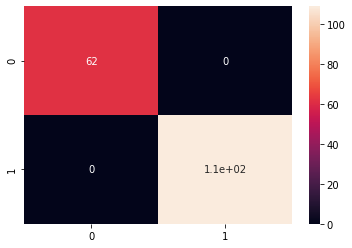

In [53]:
sns.heatmap(conf_matrix, annot=True)

In [54]:
print(classification_report(Y_test, optimized_predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        62
         1.0       1.00      1.00      1.00       109

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



In [55]:
accuracy = (conf_matrix[0][0] + conf_matrix[1][1]) / (conf_matrix[0][0] + conf_matrix[0][1] + conf_matrix[1][0] + conf_matrix[1][1])
print (f'''\tThe model achieved an accuracy of {accuracy*100}% prior to parameter tuning. 
        This is {accuracy*100-79:.2f}% greater than that of an average physician.''')

	The model achieved an accuracy of 100.0% prior to parameter tuning. 
        This is 21.00% greater than that of an average physician.


### Conclusion

- The SVM machine learning algorithm was able to classify Malignant/Benign tumors with an accuracy of 100% following normalization.  Parameter tuning was still performed, with tuned parameters also achieving 100% accuracy. 
- This technique both outperforms doctors, and can utilize automation to rapidly evaluate breast masses and classify them.
- The technique can likely be further improved through the use of CV to directly classify tumor using simply the images of tissue